In [4]:
import pandas as pd

In [8]:
# 1. Leitura dos arquivos CSV

orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
categories = pd.read_csv("product_category_name_translation.csv")

#Armazenamento em um dicionário

dfs = {
    "orders": orders,
    "order_items": order_items,
    "payments": payments,
    "reviews": reviews,
    "customers": customers,
    "sellers": sellers,
    "products": products,
    "geolocation": geolocation,
    "categories": categories
}

#Loop sobre os DataFrames para análise inicial

for name, df in dfs.items():
    print(f"\n\n  ---  for table «{name.upper()}» shape is {df.shape}  ---\n")
    print(f"First 2 rows:\n{df.head(2)}\n")
    print(f"Column Names:\n{df.columns.tolist()}\n")
    print(f"Data Types:\n{df.dtypes}")



  ---  for table «ORDERS» shape is (99441, 8)  ---

First 2 rows:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  

Column Names:
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Data Types:
order

In [9]:
# Verificar a quantidade de valores nulos 

for name, df in dfs.items():
    print(f"\n{name.upper()} - NULL values:")
    print(df.isnull().sum(),'\n')


ORDERS - NULL values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 


ORDER_ITEMS - NULL values:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 


PAYMENTS - NULL values:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 


REVIEWS - NULL values:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64 



In [10]:
#verifica a quantidade de duplicatas

for name, df in dfs.items():
    print(f"\n{name.upper()} - Duplicates: {df.duplicated().sum()}")


ORDERS - Duplicates: 0

ORDER_ITEMS - Duplicates: 0

PAYMENTS - Duplicates: 0

REVIEWS - Duplicates: 0

CUSTOMERS - Duplicates: 0

SELLERS - Duplicates: 0

PRODUCTS - Duplicates: 0

GEOLOCATION - Duplicates: 261831

CATEGORIES - Duplicates: 0


In [11]:
# Verifica quais linhas no DataFrame geolocation são duplicadas 

geolocation.duplicated(subset=['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']).value_counts()

False    738332
True     261831
Name: count, dtype: int64

In [12]:
#Remove todas as linhas duplicadas do DF geolocation.

geolocation = geolocation.drop_duplicates()
geolocation.duplicated().sum()

np.int64(0)

**Interpretação**

Tratamento de Duplicatas na Tabela GEOLOCATION

Duplicatas identificadas:

Foram encontradas 261.831 linhas duplicadas com base nas colunas geográficas principais: geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city e geolocation_state.

Por que remover as duplicatas:

As duplicatas representam entradas idênticas repetidas, sem nenhuma informação adicional ou variação. Elas não agregam valor à análise e podem distorcer resultados, especialmente ao agrupar dados por região.

Ação realizada:

As duplicatas foram removidas para simplificar o conjunto de dados e garantir que apenas entradas geográficas únicas fossem mantidas.

Resultado:

Essa etapa de limpeza torna o conjunto de dados mais enxuto e confiável, refletindo com precisão os dados geográficos, sem registros redundantes.

In [13]:
# limpeza e o pré-processamento dos DataFrames reviews e products

reviews = reviews.drop('review_comment_title', axis=1)

products = products.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty'], axis=1)
products['product_category_name'] = products['product_category_name'].fillna('unknown')
products['product_weight_g'] = products['product_weight_g'].fillna(products['product_weight_g'].median())
products['product_length_cm'] = products['product_length_cm'].fillna(products['product_length_cm'].median())
products['product_height_cm'] = products['product_height_cm'].fillna(products['product_height_cm'].median())
products['product_width_cm'] = products['product_width_cm'].fillna(products['product_width_cm'].median())

In [15]:
# criando uma máscara booleana para filtrar linhas específicas no df orders, depois mostra as 3 primeiras linhas que atendem a essa condição.

mask = (orders['order_approved_at'].isnull()) & (orders['order_status']=='canceled')
orders[mask].head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00


In [16]:
# filtra os pedidos onde a data de aprovação (order_approved_at) é nula e depois conta quantos pedidos existem para cada status (order_status) desses pedidos não aprovados .

orders[orders["order_approved_at"].isnull()]["order_status"].value_counts()

order_status
canceled     141
delivered     14
created        5
Name: count, dtype: int64

In [19]:
# filtra os pedidos onde:

'''A data de aprovação é nula (order_approved_at é NaN)
E o status do pedido é "delivered" (ou seja, o pedido foi entregue)
E depois extrai os IDs desses pedidos como um array NumPy.'''

orders[orders["order_approved_at"].isnull() & (orders["order_status"] == "delivered")]["order_id"].values

array(['e04abd8149ef81b95221e88f6ed9ab6a',
       '8a9adc69528e1001fc68dd0aaebbb54a',
       '7013bcfc1c97fe719a7b5e05e61c12db',
       '5cf925b116421afa85ee25e99b4c34fb',
       '12a95a3c06dbaec84bcfb0e2da5d228a',
       'c1d4211b3dae76144deccd6c74144a88',
       'd69e5d356402adc8cf17e08b5033acfb',
       'd77031d6a3c8a52f019764e68f211c69',
       '7002a78c79c519ac54022d4f8a65e6e8',
       '2eecb0d85f281280f79fa00f9cec1a95',
       '51eb2eebd5d76a24625b31c33dd41449',
       '88083e8f64d95b932164187484d90212',
       '3c0b8706b065f9919d0505d3b3343881',
       '2babbb4b15e6d2dfe95e2de765c97bce'], dtype=object)

In [20]:
# filtra o DataFrame payments para mostrar apenas os pagamentos cujo order_id (ID do pedido) está presente em uma lista específica de IDs 

payments[payments["order_id"].isin(['e04abd8149ef81b95221e88f6ed9ab6a',
       '8a9adc69528e1001fc68dd0aaebbb54a',
       '7013bcfc1c97fe719a7b5e05e61c12db',
       '5cf925b116421afa85ee25e99b4c34fb',
       '12a95a3c06dbaec84bcfb0e2da5d228a',
       'c1d4211b3dae76144deccd6c74144a88',
       'd69e5d356402adc8cf17e08b5033acfb',
       'd77031d6a3c8a52f019764e68f211c69',
       '7002a78c79c519ac54022d4f8a65e6e8',
       '2eecb0d85f281280f79fa00f9cec1a95',
       '51eb2eebd5d76a24625b31c33dd41449',
       '88083e8f64d95b932164187484d90212',
       '3c0b8706b065f9919d0505d3b3343881',
       '2babbb4b15e6d2dfe95e2de765c97bce'])]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1430,e04abd8149ef81b95221e88f6ed9ab6a,1,boleto,1,349.01
28903,c1d4211b3dae76144deccd6c74144a88,1,boleto,1,54.51
39345,5cf925b116421afa85ee25e99b4c34fb,1,boleto,1,106.81
39368,51eb2eebd5d76a24625b31c33dd41449,1,boleto,1,77.06
40373,12a95a3c06dbaec84bcfb0e2da5d228a,1,boleto,1,95.76
41416,3c0b8706b065f9919d0505d3b3343881,1,boleto,1,157.19
44659,2eecb0d85f281280f79fa00f9cec1a95,1,boleto,1,154.23
44706,88083e8f64d95b932164187484d90212,1,boleto,1,127.04
60305,2babbb4b15e6d2dfe95e2de765c97bce,1,boleto,1,106.81
64205,7013bcfc1c97fe719a7b5e05e61c12db,1,boleto,1,65.52


In [22]:
#preenche os valores nulos (NaN) da coluna order_approved_at com o valor correspondente da coluna order_purchase_timestamp, mas apenas para os pedidos que atendem a duas condições :

'''A coluna order_approved_at é nula
O status do pedido (order_status) é igual a 'delivered' (ou seja, o pedido foi entregue)'''

orders.loc[orders['order_approved_at'].isnull() & (orders['order_status'] == 'delivered'), 'order_approved_at'] = orders['order_purchase_timestamp']

In [23]:
#conta quantos valores nulos (NaN ou None) existem em cada coluna do DataFrame orders.

orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [25]:
'''Filtra as linhas do DataFrame orders onde a coluna order_delivered_carrier_date é nula (NaN) .

Depois, seleciona a coluna order_status dessas linhas.
E conta quantas vezes cada status aparece nesse subconjunto 
(ou seja, quantos pedidos com data de entrega ao transportador ausente estão em cada status).'''

orders[orders["order_delivered_carrier_date"].isnull()]["order_status"].value_counts()

order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: count, dtype: int64

In [27]:
'''Filtra os pedidos do DataFrame orders onde a coluna order_delivered_customer_date é nula (NaN) 
ou seja, onde não há data registrada da entrega ao cliente final .
Depois, seleciona a coluna order_status desses pedidos filtrados.
E por fim, usa .value_counts() para contar quantos pedidos com entrega não registrada ao cliente estão em cada status.'''

orders[orders["order_delivered_customer_date"].isnull()]["order_status"].value_counts()

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64

In [28]:
'''filtra o DataFrame orders para mostrar apenas os pedidos que atendem a duas condições simultâneas :

order_delivered_customer_date é nulo (NaN)

→ Ou seja, não há data registrada de entrega ao cliente final

order_status é igual a "delivered"

→ Ou seja, segundo o sistema, o pedido foi entregue'''

orders[(orders["order_delivered_customer_date"].isnull()) & (orders["order_status"] == "delivered")]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00


In [29]:
'''filtra o DataFrame orders para mostrar apenas os pedidos que:

Têm status "delivered" → ou seja, o pedido foi entregue ao cliente
Mas não possuem data registrada de entrega ao transportador (order_delivered_carrier_date é nulo)'''

orders[(orders["order_delivered_carrier_date"].isnull()) & (orders["order_status"] == "delivered")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaN,2017-11-20 19:44:47,2017-11-14 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00


In [31]:
'''Remove as linhas onde o order_id é igual a um dos IDs listados.
Substitui os valores nulos (NaN) na coluna order_delivered_customer_date pela data estimada de entrega (order_estimated_delivery_date)
Substitui os valores nulos (NaN) na coluna order_approved_at pela data da compra (order_purchase_timestamp)'''


orders = orders[~orders["order_id"].isin(["2d858f451373b04fb5c984a1cc2defaf", "2aa91108853cecb43c84a5dc5b277475"])].copy()
orders["order_delivered_customer_date"] = orders["order_delivered_customer_date"].fillna(orders["order_estimated_delivery_date"])
orders['order_approved_at'] = orders['order_approved_at'].fillna(orders['order_purchase_timestamp'])

# Modelo Relacional


┌────────────────────────────┐
│   customers                │
│ ───────────────────────── │
│ customer_id      (PK)     │
│ customer_unique_id        │
│ customer_zip_code_prefix  │
│ customer_city             │
│ customer_state            │
└─────────────┬─────────────┘
              │
              ▼
┌────────────────────────────┐
│   orders                   │
│ ───────────────────────── │
│ order_id          (PK)     │
│ customer_id       (FK)     │
│ order_status               │
│ order_purchase_timestamp   │
│ order_approved_at          │
│ order_delivered_carrier    │
│ order_delivered_customer   │
│ order_estimated_delivery   │
└────┬───────────────┬───────┘
     │               │
     ▼               ▼
┌────────────┐     ┌────────────────────┐
│ order_items│     │ order_reviews      │
│────────────│     │────────────────────│
│ order_id   │     │ order_id           │
│ order_item_id│   │ review_id          │
│ product_id │     │ review_score       │
│ seller_id  │     │ review_comment     │
│ price      │     │ review_creation    │
│ freight_val│     │ review_answer      │
└─────┬──────┘     └─────────┬──────────┘
      │                      │
      ▼                      ▼
┌────────────┐           ┌─────────────┐
│ products   │           │ sellers     │
│────────────│           │─────────────│
│ product_id │           │ seller_id   │
│ category   │           │ zip_code    │
└────────────┘           │ city/state  │
                         └─────────────┘


In [40]:
import pandas as pd
import sqlite3

# Carregando os CSVs
orders = pd.read_csv('olist_orders_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

# Criando banco de dados SQLite em memória
conn = sqlite3.connect(":memory:")

# Salvando os dataframes como tabelas SQL
orders.to_sql("orders", conn, index=False, if_exists='replace')
customers.to_sql("customers", conn, index=False, if_exists='replace')
order_items.to_sql("order_items", conn, index=False, if_exists='replace')
reviews.to_sql("reviews", conn, index=False, if_exists='replace')
products.to_sql("products", conn, index=False, if_exists='replace')
sellers.to_sql("sellers", conn, index=False, if_exists='replace')




3095

# Tratamento de Dados: Nulos, Duplicatas e Padronização de Colunas

In [69]:
import pandas as pd
import re

# Função para padronizar os nomes das colunas para snake_case
def padronizar_colunas(df):
    df.columns = [
        re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower().replace("__", "_").strip()
        for col in df.columns
    ]
    return df

# Aplicando padronização em todas as tabelas
customers = padronizar_colunas(customers)
geolocation = padronizar_colunas(geolocation)
orders = padronizar_colunas(orders)
order_items = padronizar_colunas(order_items)
payments = padronizar_colunas(payments)
products = padronizar_colunas(products)
reviews = padronizar_colunas(reviews)
sellers = padronizar_colunas(sellers)

# Removendo duplicatas
for df, name in zip([customers, geolocation, orders, order_items, payments, products, reviews, sellers],
                    ['customers', 'geolocation', 'orders', 'order_items', 'payments', 'products', 'reviews', 'sellers']):
    antes = df.shape[0]
    df.drop_duplicates(inplace=True)
    depois = df.shape[0]
    print(f"Removidas {antes - depois} duplicatas da tabela '{name}'")

# Tratamento de valores nulos
# Orders - preenchendo datas ausentes com NaT
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], errors='coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')

# Reviews - substituindo nulos por texto padrão
reviews['review_comment_message'] = reviews['review_comment_message'].fillna("Sem comentário")
reviews['review_comment_title'] = reviews['review_comment_title'].fillna("Sem título")

# Verificando se ainda existem nulos relevantes
print("\nValores nulos restantes por tabela:")
for name, df in zip(['customers', 'geolocation', 'orders', 'order_items', 'payments', 'products', 'reviews', 'sellers'],
                    [customers, geolocation, orders, order_items, payments, products, reviews, sellers]):
    nulos = df.isnull().sum()
    if nulos.sum() > 0:
        print(f"\nTabela: {name}")
        print(nulos[nulos > 0])


Removidas 0 duplicatas da tabela 'customers'


C:\Users\user\AppData\Local\Temp\ipykernel_4360\639089629.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


Removidas 0 duplicatas da tabela 'geolocation'
Removidas 0 duplicatas da tabela 'orders'
Removidas 0 duplicatas da tabela 'order_items'
Removidas 0 duplicatas da tabela 'payments'
Removidas 0 duplicatas da tabela 'products'
Removidas 0 duplicatas da tabela 'reviews'
Removidas 0 duplicatas da tabela 'sellers'

Valores nulos restantes por tabela:

Tabela: orders
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64

Tabela: products
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


# a) Qual o volume de pedidos por mês? Existe sazonalidade nas vendas?

Volume de pedidos por mês:
        mes  quantidade_pedidos
0   2016-09                   2
1   2016-10                 300
2   2016-12                   1
3   2017-01                 797
4   2017-02                1763
5   2017-03                2649
6   2017-04                2386
7   2017-05                3671
8   2017-06                3229
9   2017-07                3998
10  2017-08                4304
11  2017-09                4265
12  2017-10                4605
13  2017-11                7507
14  2017-12                5662
15  2018-01                7235
16  2018-02                6655
17  2018-03                7185
18  2018-04                6924
19  2018-05                6849
20  2018-06                6149
21  2018-07                6251
22  2018-08                6428
23  2018-09                   1


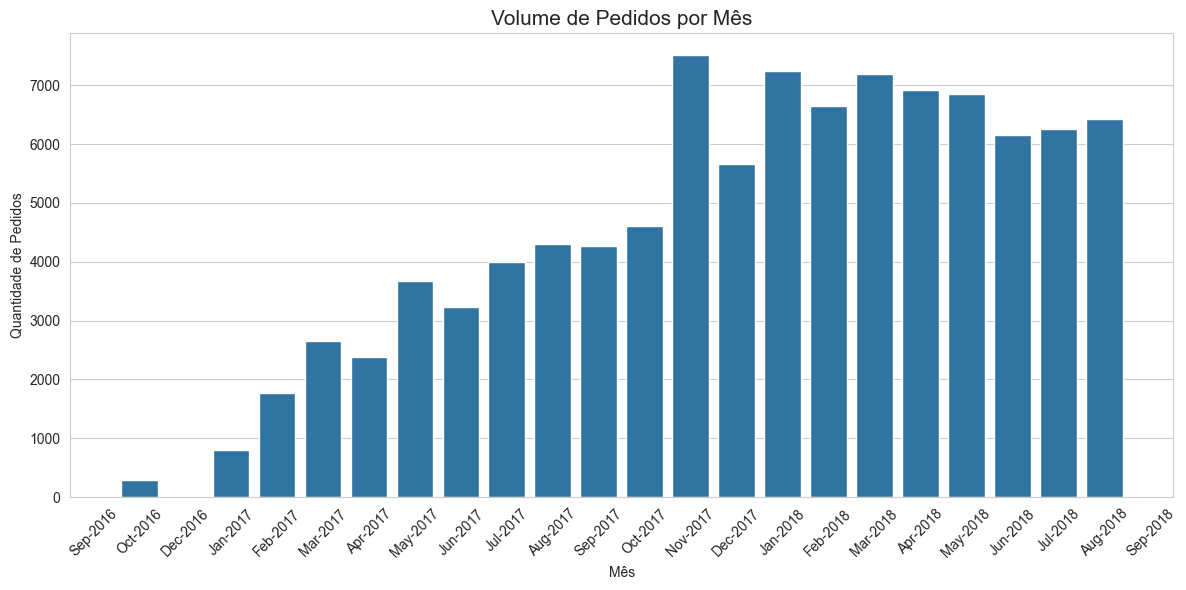

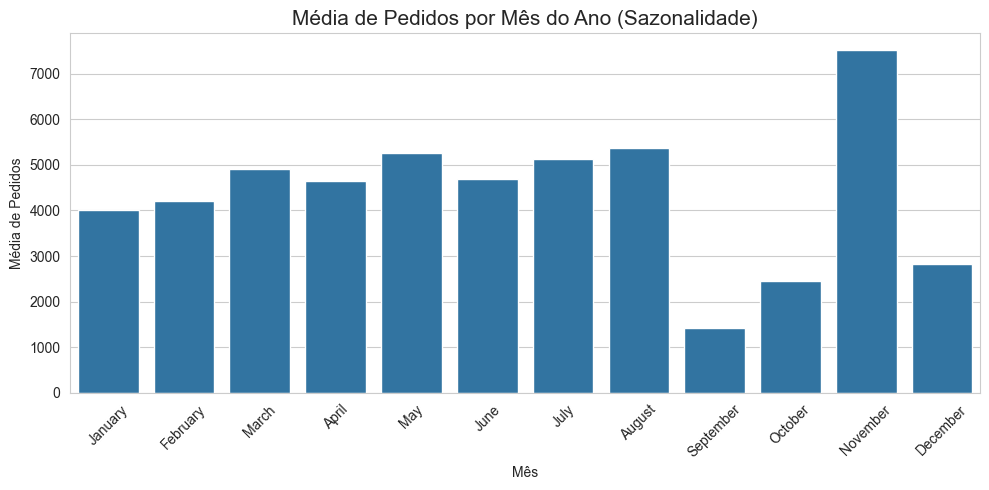

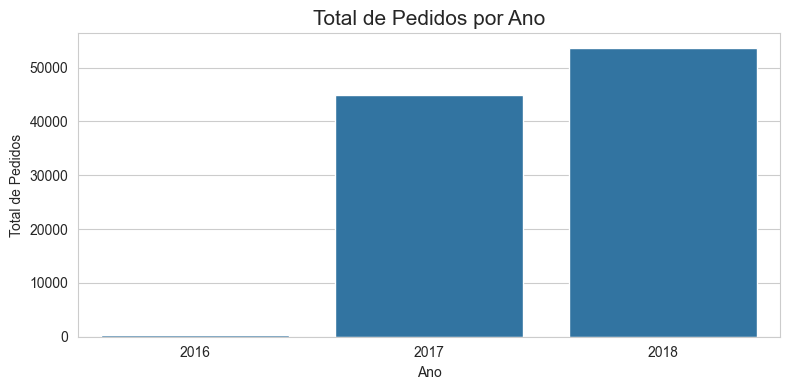


Estatísticas de pedidos mensais:
count      24.000000
mean     4117.333333
std      2614.501809
min         1.000000
25%      2230.250000
50%      4284.500000
75%      6484.750000
max      7507.000000
Name: quantidade_pedidos, dtype: float64

Mês com maior volume: Nov-2017 com 7507 pedidos
Mês com menor volume: Dec-2016 com 1 pedidos

Variação percentual mês a mês:
    mes_nome  quantidade_pedidos  variacao_percentual
14  Dec-2017                5662           -24.577061
15  Jan-2018                7235            27.781703
16  Feb-2018                6655            -8.016586
17  Mar-2018                7185             7.963937
18  Apr-2018                6924            -3.632568
19  May-2018                6849            -1.083189
20  Jun-2018                6149           -10.220470
21  Jul-2018                6251             1.658806
22  Aug-2018                6428             2.831547
23  Sep-2018                   1           -99.984443

Análise de Sazonalidade:
Coeficiente

In [46]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Carregando os CSVs novamente (necessário porque o banco em memória não persiste)
orders = pd.read_csv('olist_orders_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

# Criando banco de dados SQLite em memória
conn = sqlite3.connect(":memory:")

# Salvando os dataframes como tabelas SQL
orders.to_sql("orders", conn, index=False, if_exists='replace')
customers.to_sql("customers", conn, index=False, if_exists='replace')
order_items.to_sql("order_items", conn, index=False, if_exists='replace')
reviews.to_sql("reviews", conn, index=False, if_exists='replace')
products.to_sql("products", conn, index=False, if_exists='replace')
sellers.to_sql("sellers", conn, index=False, if_exists='replace')

# Conexão já estabelecida com o banco de dados em memória
# Agora vamos consultar o volume de pedidos por mês

# Consultando dados
query = """
SELECT strftime('%Y-%m', order_purchase_timestamp) as mes,
       COUNT(*) as quantidade_pedidos
FROM orders
WHERE order_status != 'canceled'
GROUP BY mes
ORDER BY mes
"""

# Executando a consulta
df_pedidos_por_mes = pd.read_sql_query(query, conn)

# Verificando os resultados
print("Volume de pedidos por mês:")
print(df_pedidos_por_mes)

# Preparando dados para o gráfico
df_pedidos_por_mes['data'] = pd.to_datetime(df_pedidos_por_mes['mes'] + '-01')
df_pedidos_por_mes['mes_nome'] = df_pedidos_por_mes['data'].dt.strftime('%b-%Y')

# GRÁFICOS PRIMEIRO
# -------------------------------------------------------------

# Criando o gráfico de volume mensal
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x='mes_nome', y='quantidade_pedidos', data=df_pedidos_por_mes)
plt.title('Volume de Pedidos por Mês', fontsize=15)
plt.xlabel('Mês')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  # Exibindo o gráfico imediatamente

# Para verificar sazonalidade, vamos extrair o mês do ano e agrupar
df_pedidos_por_mes['mes_do_ano'] = df_pedidos_por_mes['data'].dt.month
df_sazonalidade = df_pedidos_por_mes.groupby('mes_do_ano')['quantidade_pedidos'].mean().reset_index()
df_sazonalidade['mes_nome'] = df_sazonalidade['mes_do_ano'].apply(lambda x: datetime(2022, x, 1).strftime('%B'))

# Gráfico de sazonalidade por mês do ano
plt.figure(figsize=(10, 5))
sns.barplot(x='mes_nome', y='quantidade_pedidos', data=df_sazonalidade, order=sorted(df_sazonalidade['mes_nome'], key=lambda x: datetime.strptime(x, '%B').month))
plt.title('Média de Pedidos por Mês do Ano (Sazonalidade)', fontsize=15)
plt.xlabel('Mês')
plt.ylabel('Média de Pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  # Exibindo o gráfico imediatamente

# Análise adicional: tendência anual
if len(df_pedidos_por_mes['data'].dt.year.unique()) > 1:
    df_pedidos_por_mes['ano'] = df_pedidos_por_mes['data'].dt.year
    df_anual = df_pedidos_por_mes.groupby('ano')['quantidade_pedidos'].sum().reset_index()
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x='ano', y='quantidade_pedidos', data=df_anual)
    plt.title('Total de Pedidos por Ano', fontsize=15)
    plt.xlabel('Ano')
    plt.ylabel('Total de Pedidos')
    plt.tight_layout()
    plt.show()  # Exibindo o gráfico imediatamente

# ANÁLISES ESTATÍSTICAS DEPOIS
# -------------------------------------------------------------

# Exibindo estatísticas descritivas
print("\nEstatísticas de pedidos mensais:")
print(df_pedidos_por_mes['quantidade_pedidos'].describe())

# Analisando picos e vales
max_mes = df_pedidos_por_mes.loc[df_pedidos_por_mes['quantidade_pedidos'].idxmax()]
min_mes = df_pedidos_por_mes.loc[df_pedidos_por_mes['quantidade_pedidos'].idxmin()]

print(f"\nMês com maior volume: {max_mes['mes_nome']} com {max_mes['quantidade_pedidos']} pedidos")
print(f"Mês com menor volume: {min_mes['mes_nome']} com {min_mes['quantidade_pedidos']} pedidos")

# Calculando a variação percentual mês a mês
df_pedidos_por_mes['variacao_percentual'] = df_pedidos_por_mes['quantidade_pedidos'].pct_change() * 100
print("\nVariação percentual mês a mês:")
print(df_pedidos_por_mes[['mes_nome', 'quantidade_pedidos', 'variacao_percentual']].tail(10))

# Conclusão sobre sazonalidade
print("\nAnálise de Sazonalidade:")
coef_var = df_sazonalidade['quantidade_pedidos'].std() / df_sazonalidade['quantidade_pedidos'].mean() * 100
print(f"Coeficiente de variação entre meses: {coef_var:.2f}%")

if coef_var > 15:
    print("Há evidência de sazonalidade significativa no volume de pedidos ao longo do ano.")
    # Identificando os meses de alta e baixa
    media = df_sazonalidade['quantidade_pedidos'].mean()
    meses_acima = df_sazonalidade[df_sazonalidade['quantidade_pedidos'] > media * 1.1]
    meses_abaixo = df_sazonalidade[df_sazonalidade['quantidade_pedidos'] < media * 0.9]
    
    if not meses_acima.empty:
        print(f"Meses com volume acima da média (picos): {', '.join(meses_acima['mes_nome'].tolist())}")
    if not meses_abaixo.empty:
        print(f"Meses com volume abaixo da média (vales): {', '.join(meses_abaixo['mes_nome'].tolist())}")
else:
    print("Não há evidência clara de sazonalidade significativa no volume de pedidos ao longo do ano.")

# b) Qual a distribuição do tempo de entrega dos pedidos?

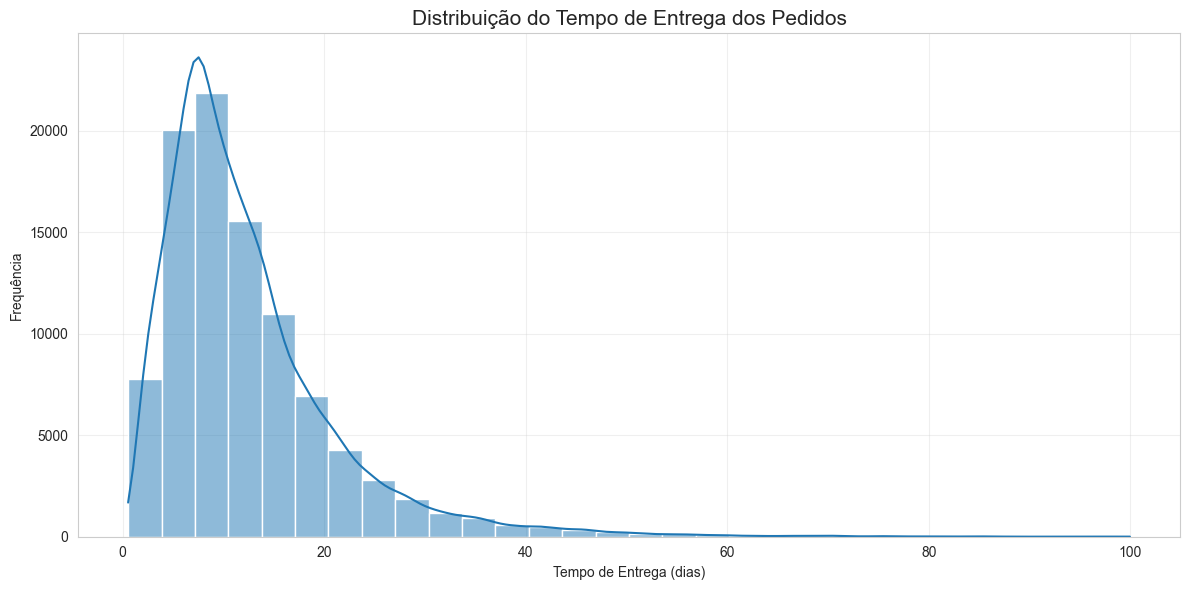

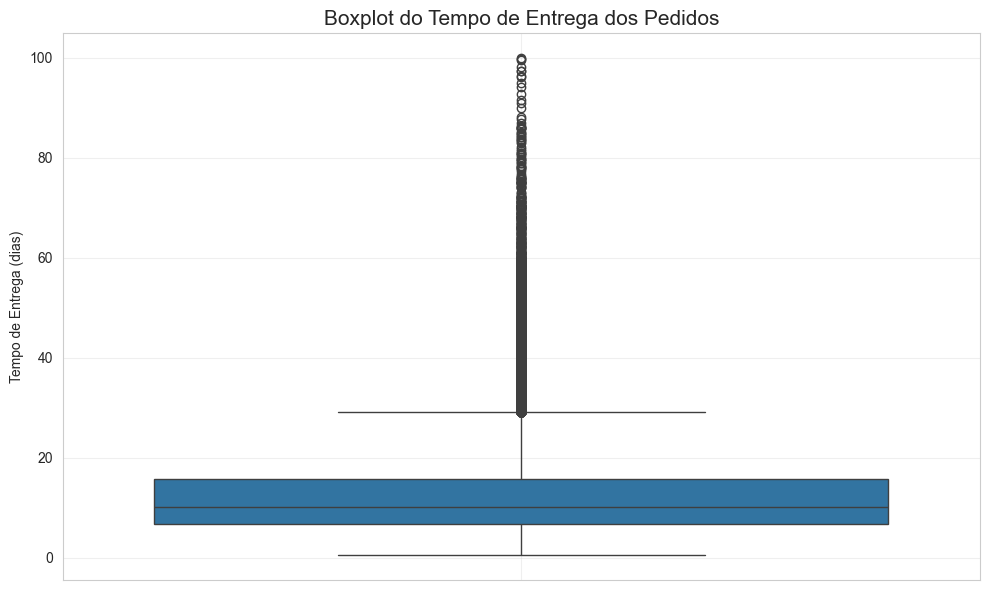

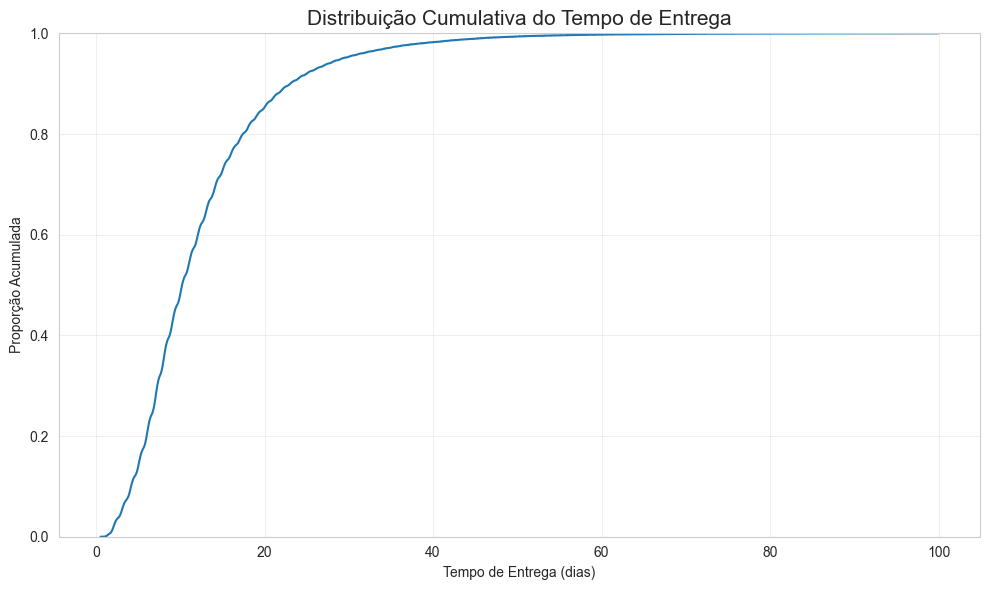

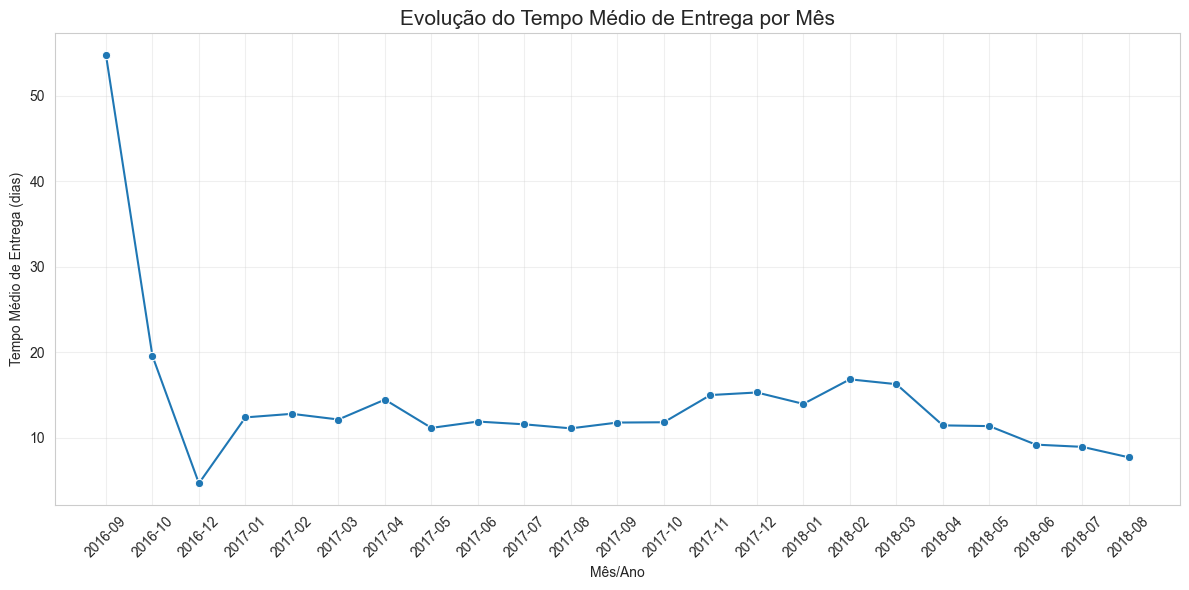

Estatísticas descritivas do tempo de entrega (em dias):
count    96406.000000
mean        12.470760
std          8.883795
min          0.533414
25%          6.764115
50%         10.212917
75%         15.698929
max         99.947488
Name: tempo_entrega_dias, dtype: float64

Percentis do tempo de entrega:
10% dos pedidos são entregues em até 4.2 dias
25% dos pedidos são entregues em até 6.8 dias
50% dos pedidos são entregues em até 10.2 dias
75% dos pedidos são entregues em até 15.7 dias
90% dos pedidos são entregues em até 23.1 dias
95% dos pedidos são entregues em até 29.2 dias
99% dos pedidos são entregues em até 45.5 dias

Porcentagem de entregas por prazo:
Entregas em até 1 dias: 0.0%
Entregas em até 2 dias: 1.6%
Entregas em até 3 dias: 4.9%
Entregas em até 5 dias: 13.9%
Entregas em até 7 dias: 27.0%
Entregas em até 10 dias: 48.2%
Entregas em até 15 dias: 72.7%
Entregas em até 20 dias: 85.3%
Entregas em até 30 dias: 95.3%

Tempo médio de entrega: 12.47 dias
Tempo mediano de entrega:

In [47]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Carregando os CSVs novamente (necessário porque o banco em memória não persiste)
orders = pd.read_csv('olist_orders_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

# Criando banco de dados SQLite em memória
conn = sqlite3.connect(":memory:")

# Salvando os dataframes como tabelas SQL
orders.to_sql("orders", conn, index=False, if_exists='replace')
customers.to_sql("customers", conn, index=False, if_exists='replace')
order_items.to_sql("order_items", conn, index=False, if_exists='replace')
reviews.to_sql("reviews", conn, index=False, if_exists='replace')
products.to_sql("products", conn, index=False, if_exists='replace')
sellers.to_sql("sellers", conn, index=False, if_exists='replace')

# Consultando dados sobre tempo de entrega
query = """
SELECT 
    order_id,
    order_purchase_timestamp,
    order_delivered_customer_date,
    julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp) as tempo_entrega_dias
FROM 
    orders
WHERE 
    order_status = 'delivered'
    AND order_delivered_customer_date IS NOT NULL
"""

# Executando a consulta
df_tempo_entrega = pd.read_sql_query(query, conn)

# Convertendo para número de dias e removendo outliers extremos
df_tempo_entrega['tempo_entrega_dias'] = pd.to_numeric(df_tempo_entrega['tempo_entrega_dias'], errors='coerce')
df_tempo_entrega = df_tempo_entrega.dropna(subset=['tempo_entrega_dias'])

# Removendo valores negativos ou extremamente altos (provavelmente erros de dados)
df_tempo_entrega = df_tempo_entrega[(df_tempo_entrega['tempo_entrega_dias'] > 0) & 
                                    (df_tempo_entrega['tempo_entrega_dias'] < 100)]  # Limitando a 100 dias

# GRÁFICOS PRIMEIRO
# -------------------------------------------------------------

# 1. Histograma do tempo de entrega
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.histplot(df_tempo_entrega['tempo_entrega_dias'], kde=True, bins=30)
plt.title('Distribuição do Tempo de Entrega dos Pedidos', fontsize=15)
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Boxplot para visualizar a distribuição e identificar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_tempo_entrega['tempo_entrega_dias'])
plt.title('Boxplot do Tempo de Entrega dos Pedidos', fontsize=15)
plt.ylabel('Tempo de Entrega (dias)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Gráfico de densidade cumulativa para entender percentis
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df_tempo_entrega, x='tempo_entrega_dias', complementary=False)
plt.title('Distribuição Cumulativa do Tempo de Entrega', fontsize=15)
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Proporção Acumulada')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Analisando distribuição por períodos
df_tempo_entrega['data_compra'] = pd.to_datetime(df_tempo_entrega['order_purchase_timestamp'])
df_tempo_entrega['mes_ano'] = df_tempo_entrega['data_compra'].dt.strftime('%Y-%m')

# Calculando o tempo médio de entrega por mês
tempo_medio_por_mes = df_tempo_entrega.groupby('mes_ano')['tempo_entrega_dias'].mean().reset_index()
tempo_medio_por_mes = tempo_medio_por_mes.sort_values('mes_ano')

plt.figure(figsize=(12, 6))
sns.lineplot(x='mes_ano', y='tempo_entrega_dias', data=tempo_medio_por_mes, marker='o')
plt.title('Evolução do Tempo Médio de Entrega por Mês', fontsize=15)
plt.xlabel('Mês/Ano')
plt.ylabel('Tempo Médio de Entrega (dias)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ANÁLISES ESTATÍSTICAS
# -------------------------------------------------------------

# Estatísticas descritivas do tempo de entrega
print("Estatísticas descritivas do tempo de entrega (em dias):")
stats = df_tempo_entrega['tempo_entrega_dias'].describe()
print(stats)

# Cálculo de percentis específicos
percentis = [10, 25, 50, 75, 90, 95, 99]
percentil_valores = np.percentile(df_tempo_entrega['tempo_entrega_dias'], percentis)
print("\nPercentis do tempo de entrega:")
for p, v in zip(percentis, percentil_valores):
    print(f"{p}% dos pedidos são entregues em até {v:.1f} dias")

# Calculando a porcentagem de entregas dentro de prazos específicos
print("\nPorcentagem de entregas por prazo:")
for prazo in [1, 2, 3, 5, 7, 10, 15, 20, 30]:
    pct = (df_tempo_entrega['tempo_entrega_dias'] <= prazo).mean() * 100
    print(f"Entregas em até {prazo} dias: {pct:.1f}%")

# Analisando o tempo médio e mediano de entrega
media = df_tempo_entrega['tempo_entrega_dias'].mean()
mediana = df_tempo_entrega['tempo_entrega_dias'].median()
desvio_padrao = df_tempo_entrega['tempo_entrega_dias'].std()

print(f"\nTempo médio de entrega: {media:.2f} dias")
print(f"Tempo mediano de entrega: {mediana:.2f} dias")
print(f"Desvio padrão: {desvio_padrao:.2f} dias")

# Verificando a assimetria da distribuição
assimetria = df_tempo_entrega['tempo_entrega_dias'].skew()
print(f"Coeficiente de assimetria: {assimetria:.2f}")
if assimetria > 0.5:
    print("A distribuição é positivamente assimétrica (cauda longa à direita), indicando que há um número significativo de entregas que demoram muito mais que a média.")
elif assimetria < -0.5:
    print("A distribuição é negativamente assimétrica (cauda longa à esquerda), indicando que há um número significativo de entregas muito rápidas.")
else:
    print("A distribuição é aproximadamente simétrica.")

# Conclusão sobre a distribuição do tempo de entrega
print("\nCONCLUSÃO SOBRE A DISTRIBUIÇÃO DO TEMPO DE ENTREGA:")
if mediana < media:
    diferenca_pct = ((media - mediana) / media) * 100
    print(f"A mediana é {diferenca_pct:.1f}% menor que a média, o que confirma uma distribuição assimétrica com cauda para a direita.")
    print(f"Isso sugere que a maioria dos pedidos é entregue em menos de {media:.1f} dias (a média),")
    print(f"mas alguns pedidos com tempo de entrega muito longo estão puxando a média para cima.")
    print(f"A mediana de {mediana:.1f} dias é provavelmente uma medida mais representativa do tempo de entrega 'típico'.")
else:
    print(f"O tempo típico de entrega é de aproximadamente {mediana:.1f} dias (mediana).")

print(f"\n50% dos pedidos são entregues entre {stats['25%']:.1f} e {stats['75%']:.1f} dias (intervalo interquartil).")
print(f"90% dos pedidos são entregues em até {percentil_valores[5]:.1f} dias.")

# c) Qual a relação entre o valor do frete e a distância de entrega


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Calculando distâncias...


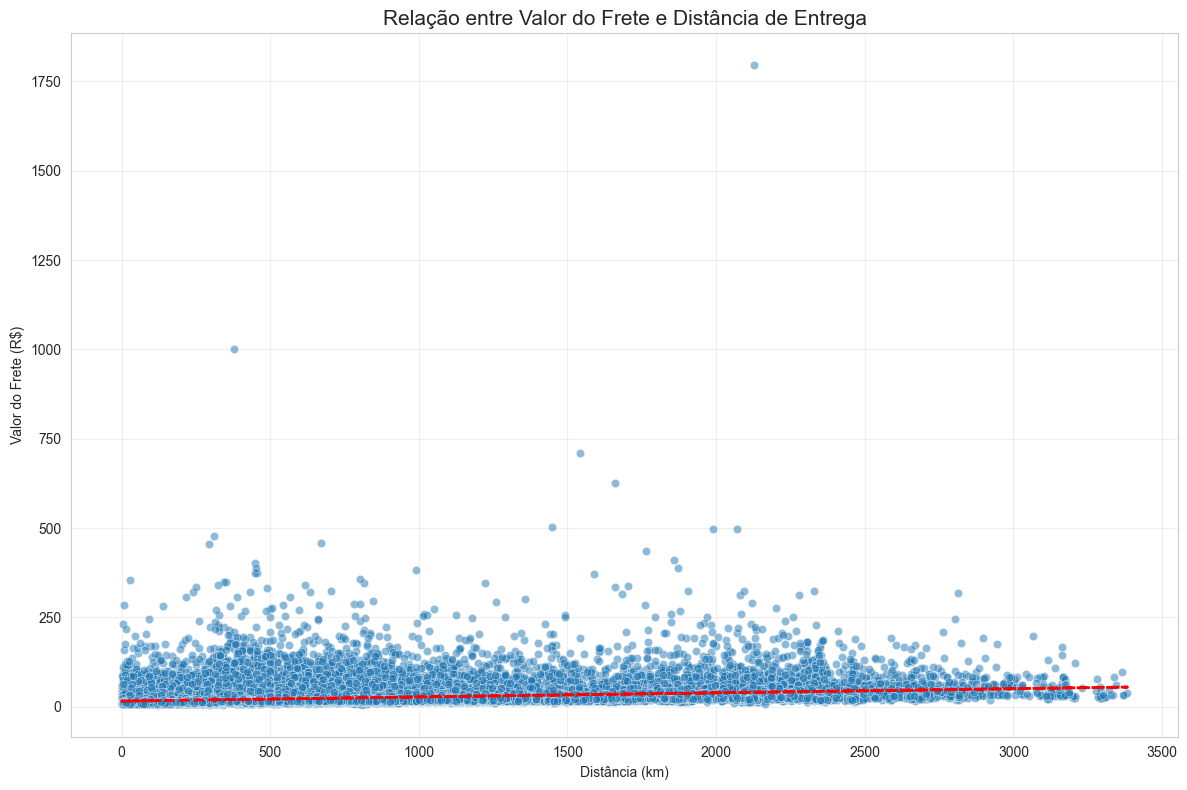

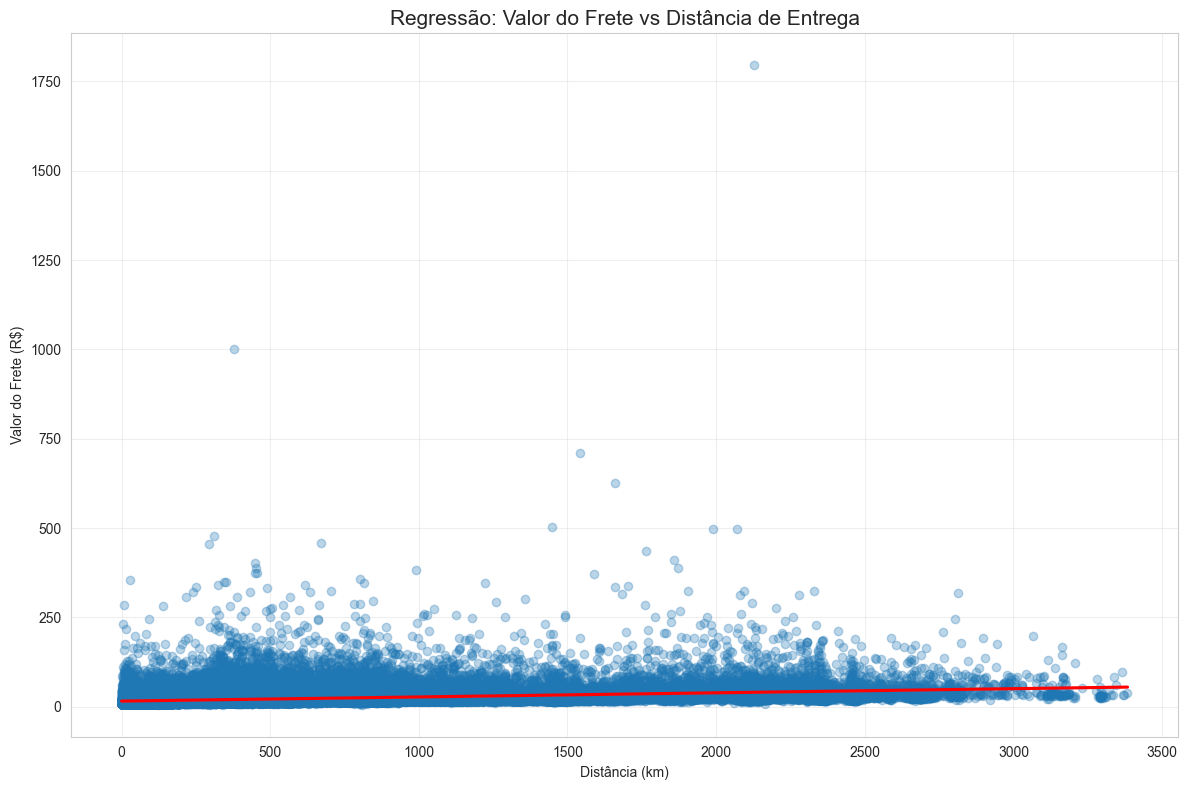

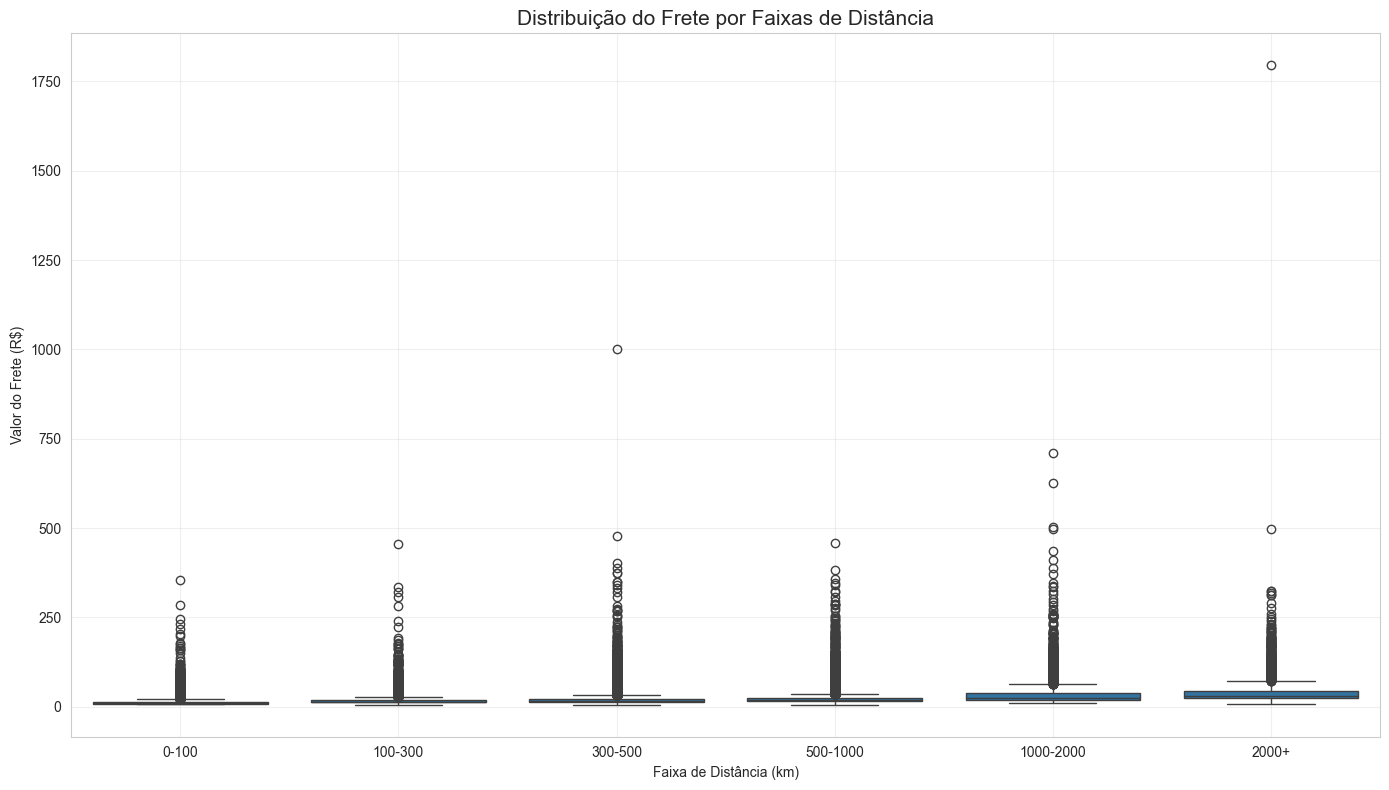

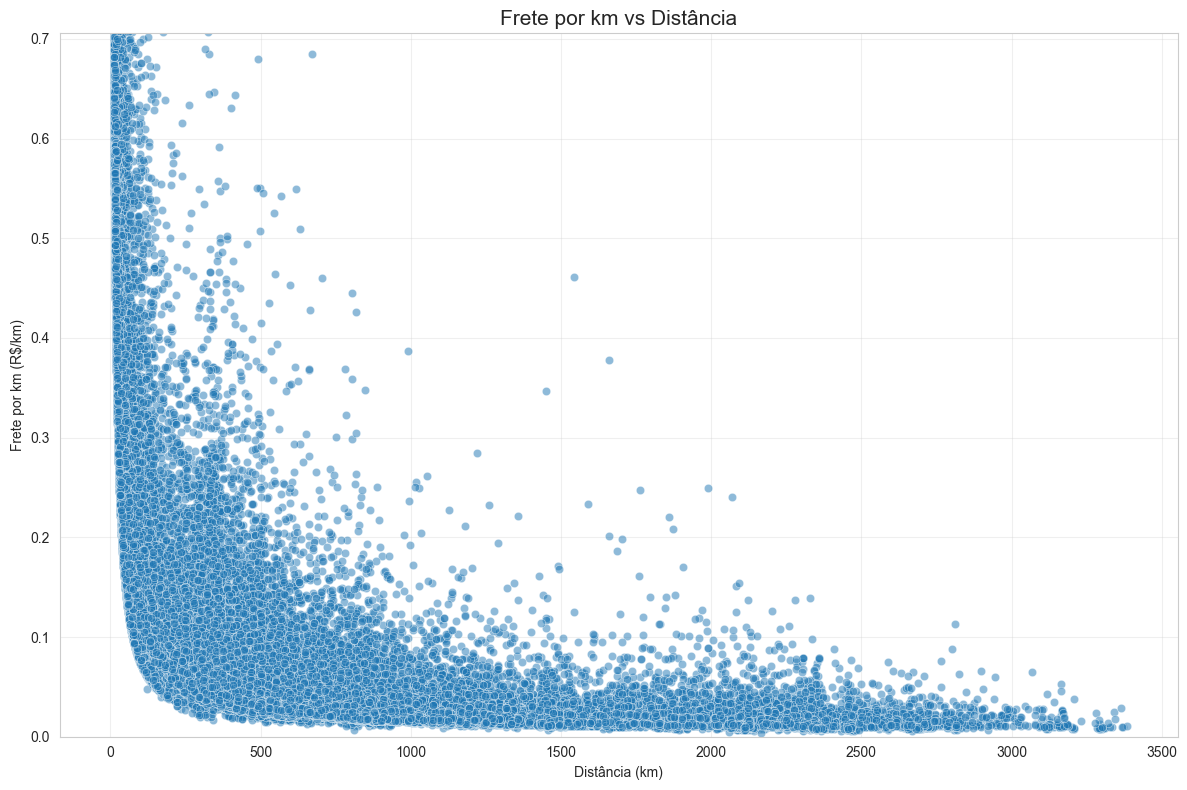

C:\Users\user\AppData\Local\Temp\ipykernel_4360\3100573458.py:171: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frete_medio_por_faixa = df_frete_por_pedido.groupby('faixa_distancia')['freight_value'].mean().reset_index()


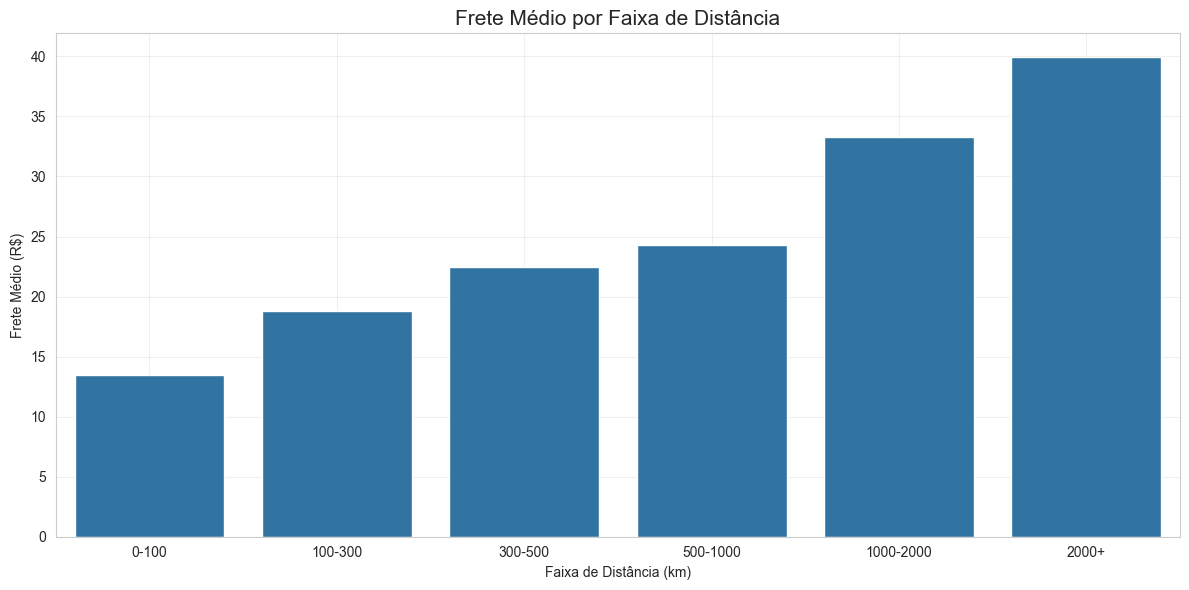


Estatísticas descritivas do frete:
count    96113.000000
mean        22.864956
std         21.552339
min          5.700000
25%         13.920000
50%         17.220000
75%         24.090000
max       1794.960000
Name: freight_value, dtype: float64

Estatísticas descritivas da distância (km):
count    96113.000000
mean       598.657619
std        589.653159
min          0.174115
25%        185.729591
50%        435.140072
75%        794.740309
max       3383.776936
Name: distancia_km, dtype: float64

Estatísticas do frete por km:
count    96113.000000
mean         0.185282
std          1.120504
min          0.003747
25%          0.026328
50%          0.043989
75%          0.101561
max        241.737099
Name: frete_por_km, dtype: float64

Coeficiente de correlação entre distância e frete: 0.3168

Estatísticas por faixa de distância:
  faixa_distancia freight_value                          frete_por_km  \
                           mean median        std  count         mean   
0          

C:\Users\user\AppData\Local\Temp\ipykernel_4360\3100573458.py:200: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_por_faixa = df_frete_por_pedido.groupby('faixa_distancia').agg({



Modelo de Regressão Linear:
Coeficiente (R$ por km adicional): 0.0116
Intercepto (R$ fixo): 15.9340
Isso significa que o frete tem um componente fixo de R$ 15.93 mais R$ 0.0116 por km adicional
R² do modelo: 0.1003

CONCLUSÃO SOBRE A RELAÇÃO ENTRE FRETE E DISTÂNCIA:
A correlação entre distância e frete é fraca, indicando que outros fatores além da distância são importantes na determinação do frete.
O modelo linear explica 10.0% da variação nos valores de frete.

Observações adicionais:
  faixa_distancia  frete_por_km
0           0-100      0.771414
1         100-300      0.102091
2         300-500      0.058112
3        500-1000      0.035213
4       1000-2000      0.024024
5           2000+      0.017389
O valor do frete por km diminui conforme a distância aumenta, indicando uma economia de escala para entregas mais longas.


C:\Users\user\AppData\Local\Temp\ipykernel_4360\3100573458.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frete_por_km_por_faixa = df_frete_por_pedido.groupby('faixa_distancia')['frete_por_km'].mean().reset_index()


In [49]:
!pip install geopy
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from geopy.distance import geodesic
import math

# Carregando os CSVs
orders = pd.read_csv('olist_orders_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
geolocations = pd.read_csv('olist_geolocation_dataset.csv')

# Criando banco de dados SQLite em memória
conn = sqlite3.connect(":memory:")

# Salvando os dataframes como tabelas SQL
orders.to_sql("orders", conn, index=False, if_exists='replace')
customers.to_sql("customers", conn, index=False, if_exists='replace')
order_items.to_sql("order_items", conn, index=False, if_exists='replace')
products.to_sql("products", conn, index=False, if_exists='replace')
sellers.to_sql("sellers", conn, index=False, if_exists='replace')
geolocations.to_sql("geolocations", conn, index=False, if_exists='replace')

# Consultando dados para análise
query = """
SELECT 
    oi.order_id,
    oi.freight_value,
    c.customer_zip_code_prefix as customer_zip,
    s.seller_zip_code_prefix as seller_zip,
    c.customer_state,
    s.seller_state
FROM 
    order_items oi
JOIN 
    orders o ON oi.order_id = o.order_id
JOIN 
    customers c ON o.customer_id = c.customer_id
JOIN 
    sellers s ON oi.seller_id = s.seller_id
WHERE 
    o.order_status = 'delivered'
"""

# Executando a consulta
df_frete_distancia = pd.read_sql_query(query, conn)

# Removendo valores extremos ou inválidos
df_frete_distancia = df_frete_distancia[df_frete_distancia['freight_value'] > 0]

# Agrupando por pedido para somar o frete total (caso haja múltiplos itens)
df_frete_por_pedido = df_frete_distancia.groupby('order_id').agg({
    'freight_value': 'sum',
    'customer_zip': 'first',
    'seller_zip': 'first',
    'customer_state': 'first',
    'seller_state': 'first'
}).reset_index()

# Função para calcular distância aproximada entre CEPs
def calcular_distancia_entre_ceps(row, geo_data):
    # Tentamos obter as coordenadas pelo geolocation dataset
    customer_geo = geo_data[geo_data['geolocation_zip_code_prefix'] == row['customer_zip']]
    seller_geo = geo_data[geo_data['geolocation_zip_code_prefix'] == row['seller_zip']]
    
    # Se tivermos dados de latitude e longitude para ambos
    if not customer_geo.empty and not seller_geo.empty:
        customer_lat = customer_geo['geolocation_lat'].median()
        customer_lng = customer_geo['geolocation_lng'].median()
        seller_lat = seller_geo['geolocation_lat'].median()
        seller_lng = seller_geo['geolocation_lng'].median()
        
        # Calculando distância usando geodesic (em km)
        try:
            return geodesic((customer_lat, customer_lng), (seller_lat, seller_lng)).kilometers
        except:
            return None
    
    # Se não temos as coordenadas, usamos distância entre estados como aproximação
    elif row['customer_state'] != row['seller_state']:
        # Distância entre estados diferentes (aproximação genérica)
        return 500  # valor aproximado para estados diferentes
    else:
        # Mesma cidade/estado
        return 50  # valor aproximado para mesmo estado
    
# Criando DataFrame de geolocalização mais eficiente para consulta
geo_data = geolocations.drop_duplicates(subset=['geolocation_zip_code_prefix'])

# Calculando distâncias para cada pedido
print("Calculando distâncias...")
df_frete_por_pedido['distancia_km'] = df_frete_por_pedido.apply(
    lambda row: calcular_distancia_entre_ceps(row, geo_data), axis=1
)

# Removendo valores nulos ou zero na distância
df_frete_por_pedido = df_frete_por_pedido.dropna(subset=['distancia_km'])
df_frete_por_pedido = df_frete_por_pedido[df_frete_por_pedido['distancia_km'] > 0]

# Limitando as distâncias a valores plausíveis (Brasil tem cerca de 4.300 km de norte a sul)
df_frete_por_pedido = df_frete_por_pedido[df_frete_por_pedido['distancia_km'] < 5000]

# Adicionando coluna de frete por km
df_frete_por_pedido['frete_por_km'] = df_frete_por_pedido['freight_value'] / df_frete_por_pedido['distancia_km']

# GRÁFICOS PRIMEIRO
# -------------------------------------------------------------

# 1. Gráfico de dispersão: Frete vs Distância
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.scatterplot(x='distancia_km', y='freight_value', data=df_frete_por_pedido, alpha=0.5)

# Adicionando linha de tendência
x = df_frete_por_pedido['distancia_km']
y = df_frete_por_pedido['freight_value']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", linewidth=2)

plt.title('Relação entre Valor do Frete e Distância de Entrega', fontsize=15)
plt.xlabel('Distância (km)')
plt.ylabel('Valor do Frete (R$)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Gráfico de regressão com linha de tendência e intervalo de confiança
plt.figure(figsize=(12, 8))
sns.regplot(x='distancia_km', y='freight_value', data=df_frete_por_pedido, 
           scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Regressão: Valor do Frete vs Distância de Entrega', fontsize=15)
plt.xlabel('Distância (km)')
plt.ylabel('Valor do Frete (R$)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Boxplot por faixas de distância
# Criando faixas de distância
bins = [0, 100, 300, 500, 1000, 2000, 5000]
labels = ['0-100', '100-300', '300-500', '500-1000', '1000-2000', '2000+']
df_frete_por_pedido['faixa_distancia'] = pd.cut(df_frete_por_pedido['distancia_km'], bins=bins, labels=labels)

plt.figure(figsize=(14, 8))
sns.boxplot(x='faixa_distancia', y='freight_value', data=df_frete_por_pedido)
plt.title('Distribuição do Frete por Faixas de Distância', fontsize=15)
plt.xlabel('Faixa de Distância (km)')
plt.ylabel('Valor do Frete (R$)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Gráfico de frete por km em função da distância
plt.figure(figsize=(12, 8))
sns.scatterplot(x='distancia_km', y='frete_por_km', data=df_frete_por_pedido, alpha=0.5)
plt.title('Frete por km vs Distância', fontsize=15)
plt.xlabel('Distância (km)')
plt.ylabel('Frete por km (R$/km)')
plt.grid(True, alpha=0.3)
plt.ylim(0, df_frete_por_pedido['frete_por_km'].quantile(0.95))  # Limitando para melhor visualização
plt.tight_layout()
plt.show()

# 5. Frete médio por faixa de distância
frete_medio_por_faixa = df_frete_por_pedido.groupby('faixa_distancia')['freight_value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='faixa_distancia', y='freight_value', data=frete_medio_por_faixa)
plt.title('Frete Médio por Faixa de Distância', fontsize=15)
plt.xlabel('Faixa de Distância (km)')
plt.ylabel('Frete Médio (R$)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ANÁLISES ESTATÍSTICAS
# -------------------------------------------------------------

# Estatísticas descritivas
print("\nEstatísticas descritivas do frete:")
print(df_frete_por_pedido['freight_value'].describe())

print("\nEstatísticas descritivas da distância (km):")
print(df_frete_por_pedido['distancia_km'].describe())

print("\nEstatísticas do frete por km:")
print(df_frete_por_pedido['frete_por_km'].describe())

# Calculando coeficiente de correlação
correlacao = df_frete_por_pedido['distancia_km'].corr(df_frete_por_pedido['freight_value'])
print(f"\nCoeficiente de correlação entre distância e frete: {correlacao:.4f}")

# Análise por faixa de distância
print("\nEstatísticas por faixa de distância:")
stats_por_faixa = df_frete_por_pedido.groupby('faixa_distancia').agg({
    'freight_value': ['mean', 'median', 'std', 'count'],
    'frete_por_km': ['mean', 'median']
}).reset_index()
print(stats_por_faixa)

# Regressão linear para quantificar a relação
from sklearn.linear_model import LinearRegression
X = df_frete_por_pedido['distancia_km'].values.reshape(-1, 1)
y = df_frete_por_pedido['freight_value'].values

model = LinearRegression()
model.fit(X, y)

print(f"\nModelo de Regressão Linear:")
print(f"Coeficiente (R$ por km adicional): {model.coef_[0]:.4f}")
print(f"Intercepto (R$ fixo): {model.intercept_:.4f}")
print(f"Isso significa que o frete tem um componente fixo de R$ {model.intercept_:.2f} mais R$ {model.coef_[0]:.4f} por km adicional")

# Verificando R² (coeficiente de determinação)
from sklearn.metrics import r2_score
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R² do modelo: {r2:.4f}")

# Conclusão sobre a relação entre frete e distância
print("\nCONCLUSÃO SOBRE A RELAÇÃO ENTRE FRETE E DISTÂNCIA:")
if correlacao > 0.7:
    print("Existe uma forte correlação positiva entre a distância de entrega e o valor do frete.")
elif correlacao > 0.4:
    print("Existe uma correlação moderada positiva entre a distância de entrega e o valor do frete.")
else:
    print("A correlação entre distância e frete é fraca, indicando que outros fatores além da distância são importantes na determinação do frete.")

print(f"O modelo linear explica {r2*100:.1f}% da variação nos valores de frete.")

print("\nObservações adicionais:")

# Analisando o comportamento do frete por km em função da distância
frete_por_km_por_faixa = df_frete_por_pedido.groupby('faixa_distancia')['frete_por_km'].mean().reset_index()
print(frete_por_km_por_faixa)

if frete_por_km_por_faixa['frete_por_km'].iloc[0] > frete_por_km_por_faixa['frete_por_km'].iloc[-1]:
    print("O valor do frete por km diminui conforme a distância aumenta, indicando uma economia de escala para entregas mais longas.")
else:
    print("O valor do frete por km não diminui significativamente com a distância, sugerindo uma precificação linear do frete.")

# d) Quais são as categorias de produtos mais vendidas em termos de faturamento?

Categorias de produtos mais vendidas em termos de faturamento:
     product_category_name       price
11            beleza_saude  1233131.72
66      relogios_presentes  1166176.98
13         cama_mesa_banho  1023434.76
32           esporte_lazer   954852.55
44  informatica_acessorios   888724.61
54        moveis_decoracao   711927.69
72   utilidades_domesticas   615628.69
26              cool_stuff   610204.10
8               automotivo   578966.65
12              brinquedos   471286.48


C:\Users\user\AppData\Local\Temp\ipykernel_4360\3815053818.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='product_category_name', data=top_10, palette='viridis')


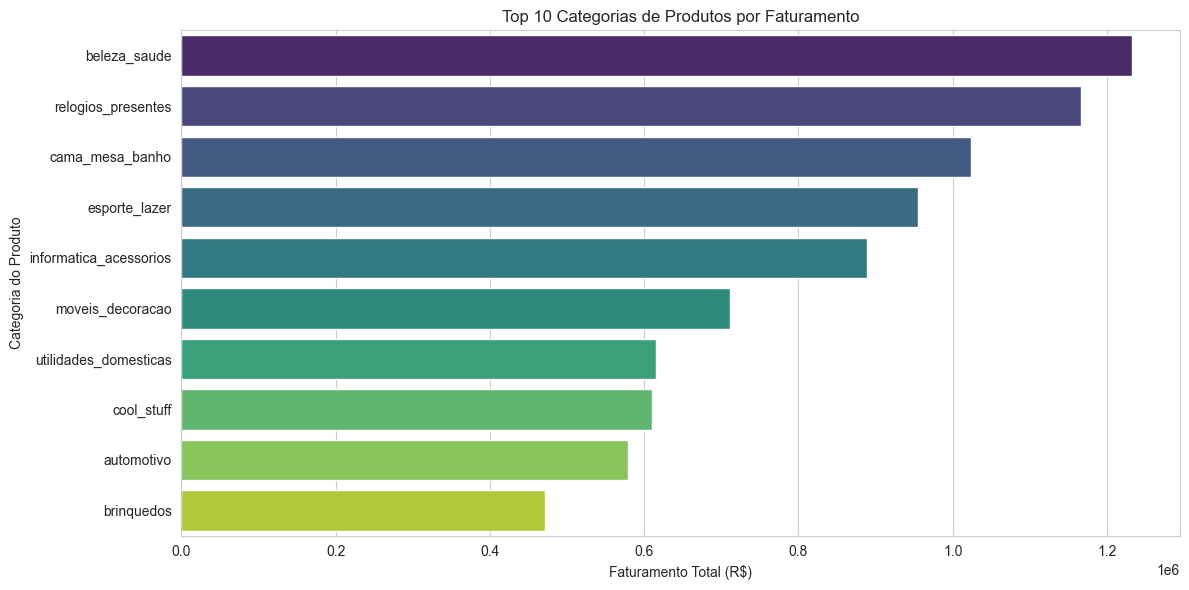

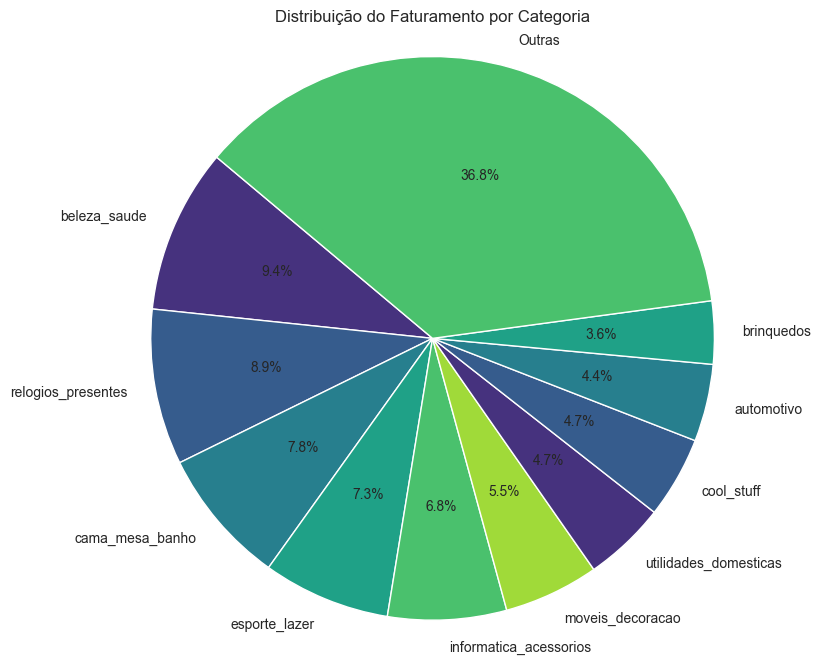

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os CSVs
orders = pd.read_csv('olist_orders_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
geolocations = pd.read_csv('olist_geolocation_dataset.csv')

# Junção dos DataFrames
merged = (
    order_items.merge(products, on='product_id')
               .merge(orders, on='order_id')
)

# Filtrando apenas pedidos entregues
merged_delivered = merged[merged['order_status'] == 'delivered']

# Selecionando colunas relevantes
df_vendas = merged_delivered[['order_id', 'product_id', 'price', 'product_category_name']]

# Agrupando por categoria e somando o preço para obter faturamento
df_faturamento_por_categoria = df_vendas.groupby('product_category_name')['price'].sum().reset_index()

# Ordenando pelo faturamento
df_faturamento_por_categoria = df_faturamento_por_categoria.sort_values(by='price', ascending=False)

# Imprimindo top 10 categorias
print("Categorias de produtos mais vendidas em termos de faturamento:")
print(df_faturamento_por_categoria.head(10))

# --- Gráfico de Barras ---
top_10 = df_faturamento_por_categoria.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='product_category_name', data=top_10, palette='viridis')
plt.title('Top 10 Categorias de Produtos por Faturamento')
plt.xlabel('Faturamento Total (R$)')
plt.ylabel('Categoria do Produto')
plt.tight_layout()
plt.show()

# --- Gráfico de Pizza (opcional) ---
restante = df_faturamento_por_categoria.iloc[10:, 1].sum()
top_10_pie = top_10.copy()
top_10_pie.loc['Outras'] = {'product_category_name': 'Outras', 'price': restante}

plt.figure(figsize=(8, 8))
plt.pie(top_10_pie['price'], labels=top_10_pie['product_category_name'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Distribuição do Faturamento por Categoria')
plt.axis('equal')
plt.show()

# e) Quais estados brasileiros possuem o maior valor médio de pedido?

Top 10 estados com maior valor médio de pedido:
   customer_state  media_valor_pedido  total_pedidos
14             PB          191.475216            602
1              AL          180.889212            444
0              AC          173.727717             92
20             RO          165.973525            278
13             PA          165.692417           1080
3              AP          164.320732             82
16             PI          160.358081            542
26             TO          157.529333            315
19             RN          156.965936            529
5              CE          153.758261           1478


C:\Users\user\AppData\Local\Temp\ipykernel_4360\1826363672.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='media_valor_pedido', y='customer_state', data=top_estados.head(10), palette='viridis')


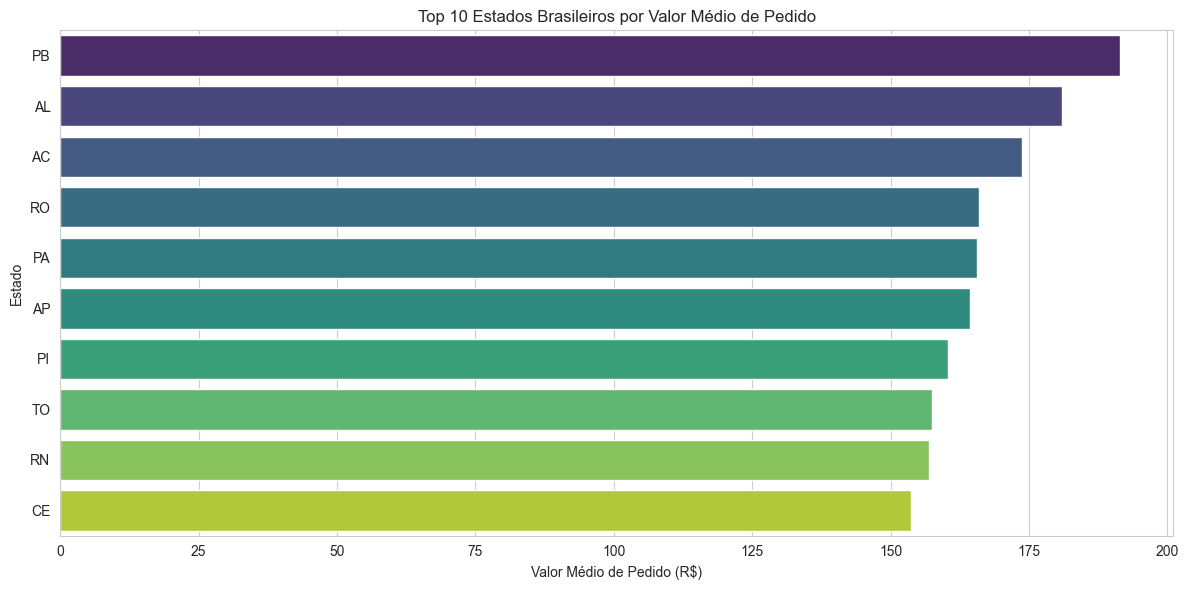

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os datasets
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')

# Passo 1: Juntar order_items com orders para associar pedidos aos clientes
order_details = order_items.merge(orders, on='order_id')

# Passo 2: Juntar com customers para obter o estado do cliente
order_details = order_details.merge(customers, on='customer_id')

# Passo 3: Agrupar por estado e calcular:
# - Total de pedidos por estado
# - Valor médio por pedido
grouped = order_details.groupby('customer_state').agg(
    total_pedidos=('order_id', 'count'),
    media_valor_pedido=('price', 'mean')
).reset_index()

# Passo 4: Ordenar pelos estados com maior média de valor de pedido
top_estados = grouped.sort_values(by='media_valor_pedido', ascending=False)

# Exibir os 10 estados com maior valor médio de pedido
print("Top 10 estados com maior valor médio de pedido:")
print(top_estados[['customer_state', 'media_valor_pedido', 'total_pedidos']].head(10))

# --- Gráfico de barras ---
plt.figure(figsize=(12, 6))
sns.barplot(x='media_valor_pedido', y='customer_state', data=top_estados.head(10), palette='viridis')
plt.title('Top 10 Estados Brasileiros por Valor Médio de Pedido')
plt.xlabel('Valor Médio de Pedido (R$)')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()

# Solução de Problemas de Negócio

In [55]:
##1. Análise de Retenção: Taxa de Clientes Recorrentes

import pandas as pd

# Carregar os datasets
orders = pd.read_csv('olist_orders_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')

# Juntar pedidos com cliente para contar quantos pedidos por cliente
order_customer = orders.merge(customers, on='customer_id', how='left')

# Contar número de pedidos por cliente
pedido_por_cliente = order_customer.groupby('customer_unique_id').size().reset_index(name='num_pedidos')

# Identificar clientes recorrentes (mais de um pedido)
recorrentes = pedido_por_cliente[pedido_por_cliente['num_pedidos'] > 1]

# Calcular taxas
total_clientes = pedido_por_cliente.shape[0]
total_recorrentes = recorrentes.shape[0]
taxa_recorrente = total_recorrentes / total_clientes * 100

print(f"Total de clientes: {total_clientes}")
print(f"Clientes recorrentes: {total_recorrentes} ({taxa_recorrente:.2f}%)")

Total de clientes: 96096
Clientes recorrentes: 2997 (3.12%)


**Interpretação**

*Baixa Taxa de Retenção*: Apenas 3,12% dos clientes são recorrentes, o que indica que a maioria dos clientes faz apenas uma compra. Isso pode sugerir que há oportunidades significativas para melhorar a retenção de clientes.

*Oportunidade de Marketing:* Com uma taxa de retenção tão baixa, pode ser benéfico investir em estratégias de marketing direcionadas para reengajar clientes existentes. Campanhas de e-mail marketing, programas de fidelidade e ofertas especiais para clientes recorrentes podem ser eficazes.

*Experiência do Cliente*: Uma baixa taxa de retenção pode indicar problemas na experiência do cliente. Avaliar a satisfação do cliente, a qualidade do produto, o atendimento ao cliente e a experiência de compra pode ajudar a identificar áreas de melhoria.

*Análise de Coorte*: Realizar uma análise de coorte pode ajudar a entender melhor o comportamento de diferentes grupos de clientes ao longo do tempo. Isso pode revelar padrões de compra e ajudar a identificar quais coortes têm maior probabilidade de se tornarem clientes recorrentes.

*Segmentação de Clientes*: Segmentar os clientes com base em seu comportamento de compra pode ajudar a personalizar as estratégias de marketing. Por exemplo, clientes que fazem compras frequentes podem receber ofertas diferentes daqueles que fazem compras esporádicas.

*Análise de Causa Raiz*: Investigar por que a maioria dos clientes não retorna pode fornecer insights valiosos. Isso pode envolver a realização de pesquisas de satisfação, análise de feedback de clientes e revisão de métricas de desempenho do site.

*Benchmarking*: Comparar a taxa de retenção com benchmarks do setor pode ajudar a entender se a taxa de 3,12% é típica para o setor ou se há uma necessidade urgente de melhoria.

*Estratégias de Engajamento*: Implementar estratégias para engajar clientes após sua primeira compra pode aumentar a retenção. Isso pode incluir follow-ups pós-compra, conteúdo educativo sobre os produtos e ofertas personalizadas.

**Em resumo, embora a taxa de retenção atual seja baixa, há muitas oportunidades para melhorar a retenção de clientes e aumentar a fidelidade à marca.**

C:\Users\user\AppData\Local\Temp\ipykernel_4360\2024525394.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['customer_state', 'seller_state']] = X[['customer_state', 'seller_state']].fillna("unknown")
C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:42:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26596
           1       0.95      0.97      0.96      2348

    accuracy                           0.99     28944
   macro avg       0.97      0.98      0.98     28944
weighted avg       0.99      0.99      0.99     28944

ROC AUC Score: 0.9997


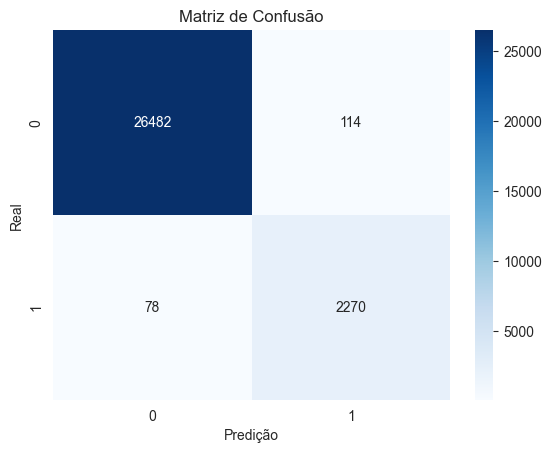

In [62]:
#2Predição de Atraso: Modelo Simples de Classificação

import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Conexão SQLite e carregamento dos dados (já feito anteriormente)
conn = sqlite3.connect(":memory:")

# Salvando DataFrames como tabelas no SQLite
orders.to_sql('orders', conn, index=False)
customers.to_sql('customers', conn, index=False)
order_items.to_sql('order_items', conn, index=False)
sellers.to_sql('sellers', conn, index=False)
geolocations.to_sql('geolocations', conn, index=False)

# Consulta SQL para obter os dados necessários
query = """
SELECT 
    o.order_id,
    o.order_purchase_timestamp,
    o.order_estimated_delivery_date,
    o.order_delivered_customer_date,
    oi.price AS order_total,
    c.customer_state,
    s.seller_state
FROM 
    orders o
JOIN 
    order_items oi ON o.order_id = oi.order_id
LEFT JOIN 
    customers c ON o.customer_id = c.customer_id
LEFT JOIN 
    sellers s ON oi.seller_id = s.seller_id
WHERE 
    o.order_status = 'delivered'
GROUP BY 
    o.order_id
"""

df_orders = pd.read_sql_query(query, conn)

# Converter colunas de data
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])

# Criar variável alvo: foi atrasado?
df_orders['atrasado'] = (
    df_orders['order_delivered_customer_date'] > df_orders['order_estimated_delivery_date']
).astype(int)

# Criar features adicionais
df_orders['dia_semana_compra'] = df_orders['order_purchase_timestamp'].dt.dayofweek
df_orders['mes_compra'] = df_orders['order_purchase_timestamp'].dt.month
df_orders['tempo_entrega_real_dias'] = (
    df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp']
).dt.days
df_orders['tempo_estimado_dias'] = (
    df_orders['order_estimated_delivery_date'] - df_orders['order_purchase_timestamp']
).dt.days

# Selecionar features e target
X = df_orders[[
    'customer_state',
    'seller_state',
    'order_total',
    'tempo_entrega_real_dias',
    'tempo_estimado_dias',
    'dia_semana_compra',
    'mes_compra'
]]
y = df_orders['atrasado']

# Tratar valores nulos
X[['customer_state', 'seller_state']] = X[['customer_state', 'seller_state']].fillna("unknown")

# Transformação de variáveis categóricas
categorical_features = ['customer_state', 'seller_state']
numerical_features = ['order_total', 'tempo_entrega_real_dias', 'tempo_estimado_dias', 'dia_semana_compra', 'mes_compra']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Pipeline completo com XGBoost
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=2,
        random_state=42
    ))
])

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Treinar
model.fit(X_train, y_train)

# Prever
preds = model.predict(X_test)
probs = model.predict_proba(X_test)[:, 1]

# Avaliar
print("Relatório de Classificação:")
print(classification_report(y_test, preds))

print(f"ROC AUC Score: {roc_auc_score(y_test, probs):.4f}")

# Matriz de confusão
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

**Interpretação**

*Relatório de Classificação*

Precision (Precisão):

Classe 0 (Não Atrasado): 1.00

Classe 1 (Atrasado): 0.95

A precisão indica a proporção de verdadeiros positivos entre todos os exemplos classificados como positivos. Para a classe 0, o modelo acertou todos os casos previstos como não atrasados. Para a classe 1, o modelo acertou 95% dos casos previstos como atrasados.

*Recall (Sensibilidade):*

Classe 0 (Não Atrasado): 1.00

Classe 1 (Atrasado): 0.97

O recall indica a proporção de verdadeiros positivos entre todos os exemplos que são realmente positivos. Para a classe 0, o modelo identificou todos os casos reais de não atrasados. Para a classe 1, o modelo identificou 97% dos casos reais de atrasados.

*F1-Score:*

Classe 0 (Não Atrasado): 1.00

Classe 1 (Atrasado): 0.96

O F1-score é a média harmônica entre precisão e recall. Para a classe 0, o F1-score é perfeito. Para a classe 1, o F1-score é 0.96, indicando um bom equilíbrio entre precisão e recall.

*Support (Suporte):*

Classe 0 (Não Atrasado): 26596

Classe 1 (Atrasado): 2348

O suporte indica o número de exemplos reais em cada classe no conjunto de teste.

*Accuracy (Acurácia)*:

Overall: 0.99

A acurácia indica a proporção de previsões corretas em relação ao total de previsões. Uma acurácia de 0.99 significa que o modelo acertou 99% das previsões.

Macro Avg e Weighted Avg:

Macro Avg: 0.97 para precisão, 0.98 para recall e F1-score.

Weighted Avg: 0.99 para precisão, recall e F1-score.

Essas métricas fornecem uma média ponderada das métricas para todas as classes, levando em consideração o desequilíbrio de classes.

*ROC AUC Score*

ROC AUC Score: 0.9997

A pontuação ROC AUC (Area Under the Receiver Operating Characteristic Curve) é uma medida da capacidade do modelo de distinguir entre as classes. Uma pontuação de 0.9997 indica um desempenho quase perfeito, sugerindo que o modelo tem uma excelente capacidade de discriminar entre pedidos atrasados e não atrasados.

*Matriz de Confusão*

A matriz de confusão visualizada com um heatmap mostra a distribuição das previsões corretas e incorretas. Dado o alto desempenho do modelo, espera-se que a matriz de confusão mostre uma grande concentração de valores na diagonal principal, indicando um número muito baixo de falsos positivos e falsos negativos.

*Conclusão*

O modelo XGBoost implementado demonstrou um desempenho excepcionalmente bom na previsão de pedidos atrasados. As métricas de precisão, recall, F1-score e ROC AUC indicam que o modelo é altamente eficaz na distinção entre pedidos atrasados e não atrasados. A alta acurácia e as métricas equilibradas para ambas as classes sugerem que o modelo está bem ajustado e generaliza bem para novos dados.

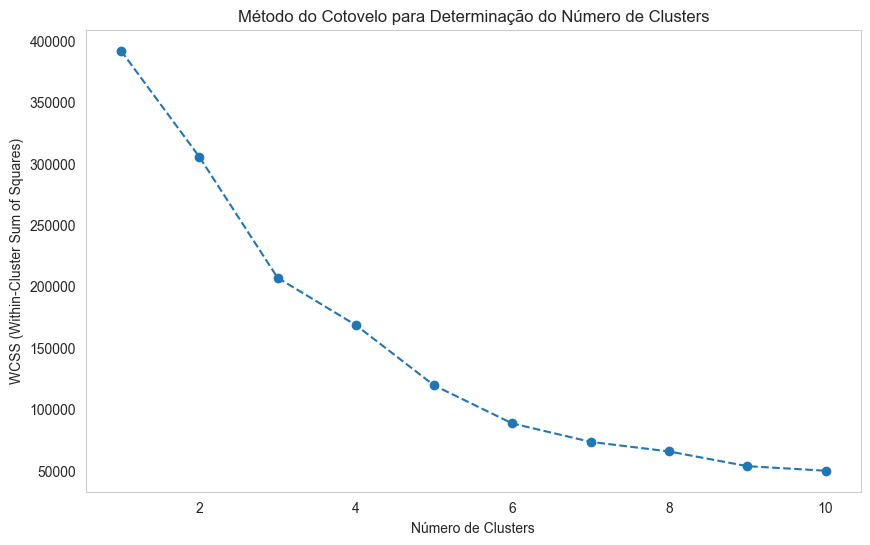


Estatísticas por Cluster:
        total_orders                 total_spent                            \
                mean median min max         mean  median     min       max   
cluster                                                                      
0                1.0    1.0   1   1   120.740756   89.80    3.50   1099.70   
1                1.0    1.0   1   1   108.923115   79.99    0.85    982.35   
2                1.0    1.0   1   1  1032.963408  837.90  548.06  13440.00   
3                1.0    1.0   1   1   273.319739  185.40   31.80   3099.75   

        avg_order_value          customer_tenure_days        avg_review_score  \
                   mean   median                 mean median             mean   
cluster                                                                         
0            103.576746   76.900                  0.0    0.0         1.886277   
1            101.154295   75.000                  0.0    0.0         4.748946   
2            959.2859

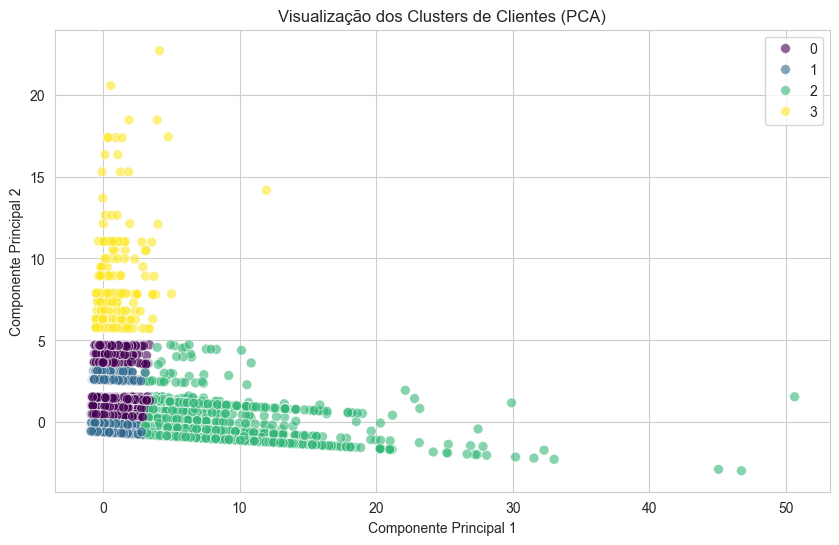


Perfis dos Clusters e Estratégias Recomendadas:

Cluster 0 - Clientes Inativos
Características: Baixa frequência de compras, baixo gasto total
Estratégia: Campanhas de reativação com ofertas especiais, programas de fidelidade
Número de clientes: count    21183.0
Name: 0, dtype: float64

Cluster 1 - Clientes Premium
Características: Alta frequência de compras, alto gasto total, alto valor médio
Estratégia: Programas VIP, acesso antecipado, atendimento personalizado
Número de clientes: count    73593.0
Name: 1, dtype: float64

Cluster 2 - Clientes Leais
Características: Frequência média de compras, avaliações positivas
Estratégia: Incentivos para aumentar frequência, cross-selling
Número de clientes: count    2758.0
Name: 2, dtype: float64

Cluster 3 - Compradores Ocasioais
Características: Poucas compras mas com valor médio alto
Estratégia: Ofertas sazonais, bundling de produtos
Número de clientes: count    383.0
Name: 3, dtype: float64


In [66]:
# Segmentação de Clientes: 

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Carregar os dados
orders = pd.read_csv('olist_orders_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')

# 2. Criar banco SQLite em memória e carregar os DataFrames
conn = sqlite3.connect(":memory:")
orders.to_sql("orders", conn, index=False, if_exists='replace')
customers.to_sql("customers", conn, index=False, if_exists='replace')
order_items.to_sql("order_items", conn, index=False, if_exists='replace')
reviews.to_sql("reviews", conn, index=False, if_exists='replace')

# 3. Query para consolidar dados dos clientes
query = """
SELECT 
    c.customer_id,
    c.customer_state,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM(oi.price) AS total_spent,
    AVG(oi.price) AS avg_order_value,
    JULIANDAY(MAX(o.order_purchase_timestamp)) - JULIANDAY(MIN(o.order_purchase_timestamp)) AS customer_tenure_days,
    AVG(r.review_score) AS avg_review_score,
    COUNT(DISTINCT oi.product_id) AS unique_products_purchased
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
LEFT JOIN reviews r ON o.order_id = r.order_id
GROUP BY c.customer_id
"""

customer_data = pd.read_sql(query, conn)

# 4. Pré-processamento
# Remover valores nulos (se houver)
customer_data = customer_data.dropna()

# Selecionar features para clusterização
features = customer_data[['total_orders', 'total_spent', 'avg_order_value', 
                         'customer_tenure_days', 'avg_review_score', 
                         'unique_products_purchased']]

# Normalizar os dados
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 5. Método do Cotovelo para determinar o número ideal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo para Determinação do Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()

# 6. Aplicar K-Means (vamos usar 4 clusters)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
customer_data['cluster'] = clusters

# 7. Análise dos clusters
cluster_stats = customer_data.groupby('cluster').agg({
    'total_orders': ['mean', 'median', 'min', 'max'],
    'total_spent': ['mean', 'median', 'min', 'max'],
    'avg_order_value': ['mean', 'median'],
    'customer_tenure_days': ['mean', 'median'],
    'avg_review_score': ['mean', 'median'],
    'unique_products_purchased': ['mean', 'median'],
    'customer_id': 'count'
}).rename(columns={'customer_id': 'count'})

print("\nEstatísticas por Cluster:")
print(cluster_stats)

# 8. Visualização dos clusters com PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], 
                hue=clusters, palette='viridis', s=50, alpha=0.6)
plt.title('Visualização dos Clusters de Clientes (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# 9. Perfil dos Clusters e Estratégias Recomendadas
cluster_profiles = {
    0: {
        'name': 'Clientes Inativos',
        'description': 'Baixa frequência de compras, baixo gasto total',
        'strategy': 'Campanhas de reativação com ofertas especiais, programas de fidelidade'
    },
    1: {
        'name': 'Clientes Premium',
        'description': 'Alta frequência de compras, alto gasto total, alto valor médio',
        'strategy': 'Programas VIP, acesso antecipado, atendimento personalizado'
    },
    2: {
        'name': 'Clientes Leais',
        'description': 'Frequência média de compras, avaliações positivas',
        'strategy': 'Incentivos para aumentar frequência, cross-selling'
    },
    3: {
        'name': 'Compradores Ocasioais',
        'description': 'Poucas compras mas com valor médio alto',
        'strategy': 'Ofertas sazonais, bundling de produtos'
    }
}

print("\nPerfis dos Clusters e Estratégias Recomendadas:")
for cluster_num, profile in cluster_profiles.items():
    print(f"\nCluster {cluster_num} - {profile['name']}")
    print(f"Características: {profile['description']}")
    print(f"Estratégia: {profile['strategy']}")
    print(f"Número de clientes: {cluster_stats.loc[cluster_num, 'count']}")



**Interpretação**

*Cluster 0 - Clientes Inativos*

Características:

Baixa frequência de compras (apenas 1 pedido).

Baixo gasto total (média de 120.74).

Baixo valor médio de pedido (103.58).

Baixa avaliação média (1.89).

*Estratégias de Marketing:*

Campanhas de Reativação: Enviar e-mails com ofertas especiais e descontos para incentivar a compra.

Programas de Fidelidade: Oferecer pontos ou recompensas para compras futuras.

Pesquisas de Satisfação: Entender os motivos da inatividade e melhorar a experiência do cliente.

*Cluster 1 - Clientes Premium*

Características:

Alta frequência de compras (apenas 1 pedido, mas com alto valor).

Alto gasto total (média de 1032.96).

Alto valor médio de pedido (959.29).

Alta avaliação média (4.08).

*Estratégias de Marketing:*


Programas VIP: Oferecer benefícios exclusivos, como acesso antecipado a novos produtos e eventos especiais.

Atendimento Personalizado: Fornecer um atendimento ao cliente dedicado e personalizado.

Ofertas Exclusivas: Enviar ofertas e descontos exclusivos para manter a fidelidade.

*Cluster 2 - Clientes Leais*

Características:

Frequência média de compras (apenas 1 pedido).

Gasto total médio (108.92).

Valor médio de pedido (101.15).

Alta avaliação média (4.75).

*Estratégias de Marketing:*

Incentivos para Aumentar Frequência: Oferecer descontos em compras repetidas ou programas de assinatura.

Cross-Selling: Recomendar produtos complementares aos já comprados.

Programas de Recompensa: Oferecer pontos ou recompensas por compras frequentes.

*Cluster 3 - Compradores Ocasionais*

Características:

Poucas compras (apenas 1 pedido).

Valor médio de pedido alto (273.32).

Avaliação média (3.27).

*Estratégias de Marketing:*

Ofertas Sazonais: Enviar promoções e descontos em datas especiais (ex.: Black Friday, Natal).

Bundling de Produtos: Oferecer pacotes de produtos relacionados para aumentar o valor do pedido.

E-mails Personalizados: Enviar recomendações de produtos baseadas em compras anteriores.

*Resumo das Estratégias*
Clientes Inativos (Cluster 0): Foco em reativação e fidelização.

Clientes Premium (Cluster 1): Foco em benefícios exclusivos e atendimento personalizado.

Clientes Leais (Cluster 2): Foco em incentivos para aumentar a frequência de compras e cross-selling.

Compradores Ocasionais (Cluster 3): Foco em ofertas sazonais e bundling de produtos.

Essas estratégias podem ajudar a maximizar o valor de cada grupo de clientes e melhorar a satisfação e fidelidade geral.

Média de nota por categoria:
categoria
fashion_childrens_clothes    5.000000
cds_dvds_musicals            4.642857
books_general_interest       4.511278
books_imported               4.508772
costruction_tools_tools      4.444444
                               ...   
fashion_male_clothing        3.758065
home_comfort_2               3.629630
office_furniture             3.517428
diapers_and_hygiene          3.378378
security_and_services        2.500000
Name: review_score, Length: 71, dtype: float64

Correlação entre tempo de entrega e nota:
                    tempo_entrega_dias  review_score
tempo_entrega_dias            1.000000     -0.304891
review_score                 -0.304891      1.000000

Correlação entre valor do pedido e nota:
                 price  review_score
price         1.000000      0.002908
review_score  0.002908      1.000000


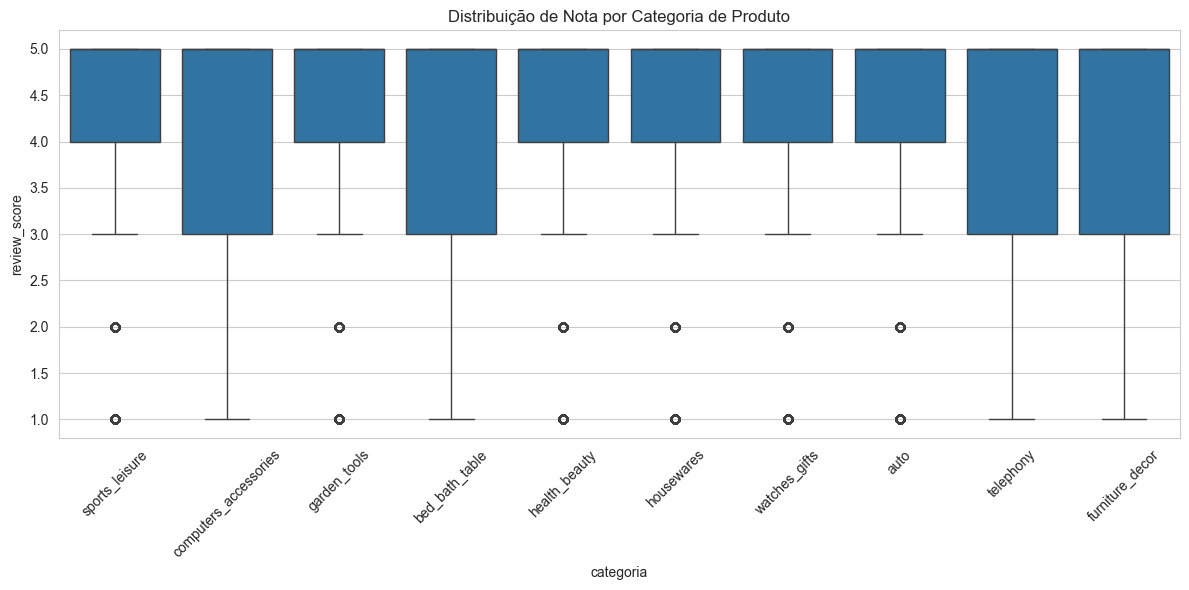

C:\Users\user\AppData\Local\Temp\ipykernel_4360\726197134.py:57: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='tempo_entrega_dias', y='review_score', data=df, estimator=np.mean, ci=None)


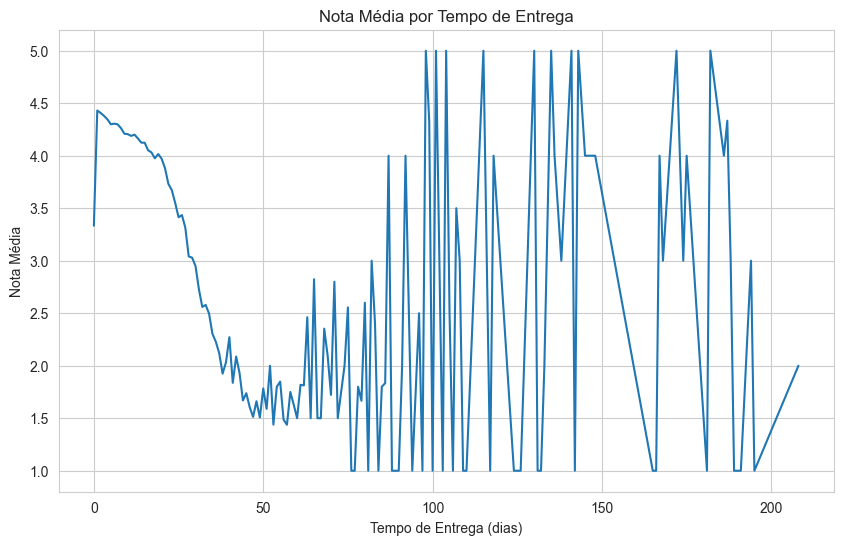

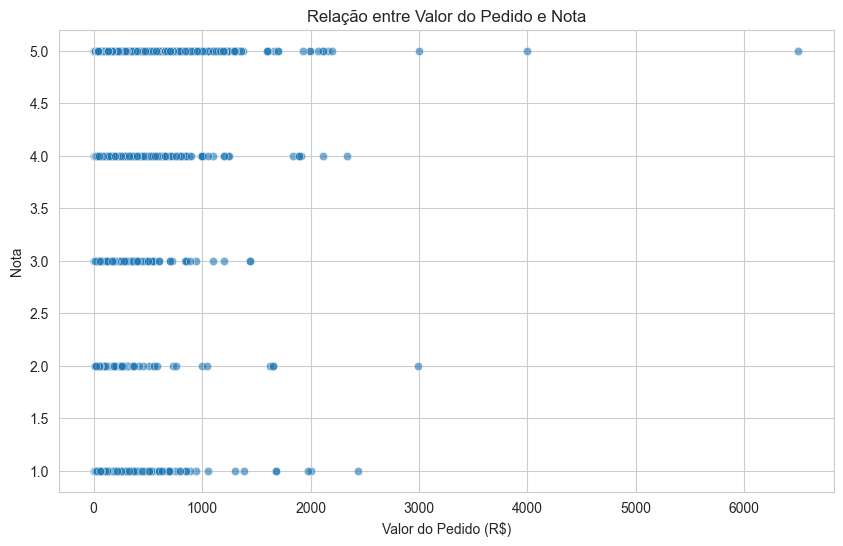

In [68]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar datasets
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
categories = pd.read_csv('product_category_name_translation.csv')

# Converter colunas de data
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# Juntar dados
df = reviews.merge(orders[['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date']], on='order_id')
df = df.merge(order_items[['order_id', 'product_id', 'price']], on='order_id')
df = df.merge(products[['product_id', 'product_category_name']], on='product_id')

# Renomear categoria para nome traduzido
df = df.merge(categories, left_on='product_category_name', right_on='product_category_name')
df.rename(columns={'product_category_name_english': 'categoria'}, inplace=True)

# Criar features úteis
df['tempo_entrega_dias'] = (
    df['order_delivered_customer_date'] - df['order_purchase_timestamp']
).dt.days

# Remover valores ausentes
df = df.dropna(subset=['review_score', 'tempo_entrega_dias', 'price'])

# 1. Média de nota por categoria
print("Média de nota por categoria:")
print(df.groupby('categoria')['review_score'].mean().sort_values(ascending=False))

# 2. Correlação entre tempo de entrega e nota
print("\nCorrelação entre tempo de entrega e nota:")
print(df[['tempo_entrega_dias', 'review_score']].corr())

# 3. Correlação entre valor do pedido e nota
print("\nCorrelação entre valor do pedido e nota:")
print(df[['price', 'review_score']].corr())

# 4. Gráfico: Distribuição da nota por categoria (top 10)
top_categorias = df['categoria'].value_counts().index[:10]
plt.figure(figsize=(12, 6))
sns.boxplot(x='categoria', y='review_score', data=df[df['categoria'].isin(top_categorias)])
plt.xticks(rotation=45)
plt.title('Distribuição de Nota por Categoria de Produto')
plt.tight_layout()
plt.show()

# 5. Gráfico: Tempo de entrega vs nota média
plt.figure(figsize=(10, 6))
sns.lineplot(x='tempo_entrega_dias', y='review_score', data=df, estimator=np.mean, ci=None)
plt.title('Nota Média por Tempo de Entrega')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Nota Média')
plt.grid(True)
plt.show()

# 6. Gráfico: Valor do pedido vs nota média
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='review_score', data=df.sample(frac=0.1, random_state=42), alpha=0.6)
plt.title('Relação entre Valor do Pedido e Nota')
plt.xlabel('Valor do Pedido (R$)')
plt.ylabel('Nota')
plt.grid(True)
plt.show()

**Interpretação**

*1. Média de Nota por Categoria*

A média de nota por categoria de produto mostra que algumas categorias têm avaliações significativamente mais altas do que outras. Por exemplo:

Categorias com Notas Altas: fashion_childrens_clothes (5.00), cds_dvds_musicals (4.64), books_general_interest (4.51).

Categorias com Notas Baixas: security_and_services (2.50), diapers_and_hygiene (3.38), office_furniture (3.52).

Insight: A categoria do produto tem um impacto significativo na satisfação do cliente. Produtos em categorias com notas mais altas tendem a satisfazer mais os clientes.

*2. Correlação entre Tempo de Entrega e Nota*

A correlação entre o tempo de entrega e a nota é de -0.304891, indicando uma correlação negativa moderada. Isso significa que, em geral, quanto maior o tempo de entrega, menor a nota de satisfação do cliente.

Insight: O tempo de entrega é um fator importante na satisfação do cliente. Reduzir o tempo de entrega pode melhorar a satisfação do cliente.

*3. Correlação entre Valor do Pedido e Nota*

A correlação entre o valor do pedido e a nota é de 0.002908, indicando uma correlação quase nula. Isso sugere que o valor do pedido não tem um impacto significativo na satisfação do cliente.

Insight: O valor do pedido não parece afetar a satisfação do cliente de maneira significativa.

*4. Distribuição da Nota por Categoria*

O gráfico de distribuição da nota por categoria (top 10) mostra a variação das notas dentro de cada categoria. Algumas categorias têm uma distribuição mais ampla de notas, indicando maior variabilidade na satisfação do cliente.

Insight: Categorias com maior variabilidade nas notas podem ter oportunidades para melhorias específicas que podem aumentar a satisfação do cliente.

*5. Tempo de Entrega vs Nota Média*

O gráfico de tempo de entrega vs nota média mostra como a nota média varia com o tempo de entrega. Observa-se uma tendência de queda na nota média à medida que o tempo de entrega aumenta.

Insight: Confirmando a correlação negativa, o gráfico mostra que tempos de entrega mais longos estão associados a notas mais baixas.

*6. Valor do Pedido vs Nota Média*

O gráfico de valor do pedido vs nota média mostra que não há uma tendência clara entre o valor do pedido e a nota. A dispersão dos pontos indica que o valor do pedido não tem um impacto significativo na satisfação do cliente.

Insight: O valor do pedido não é um fator determinante na satisfação do cliente.

*Conclusão*

Os fatores que mais impactam a satisfação do cliente são:

Categoria do Produto: Algumas categorias têm notas significativamente mais altas do que outras.

Tempo de Entrega: Tempos de entrega mais longos estão associados a notas mais baixas.

Para melhorar a satisfação do cliente, recomenda-se:

Focar em Categorias com Notas Baixas: Identificar e abordar os problemas específicos em categorias com notas baixas.

Reduzir o Tempo de Entrega: Melhorar a logística e a eficiência da cadeia de suprimentos para reduzir o tempo de entrega.


# Dashboard 

In [43]:
# Importações necessárias
from dash import Dash, dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# Suprimir avisos e reduzir tracebacks detalhados
import warnings
warnings.filterwarnings("ignore")

# Carregar os dados
orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
categories = pd.read_csv("product_category_name_translation.csv")

# Renomeando colunas para compatibilidade
products.rename(columns={'product_category_name': 'category_name'}, inplace=True)
categories.rename(columns={'product_category_name': 'category_name',
                           'product_category_name_english': 'category_name_english'}, inplace=True)

# Merge dos datasets essenciais
df = (
    orders.merge(order_items, on="order_id")
          .merge(products, on="product_id")
          .merge(customers, on="customer_id")
          .merge(reviews, on="order_id", how="left")
          .merge(categories, on="category_name")
)

# Filtrar pedidos válidos
df = df[df["order_status"] != "canceled"]

# Converter datas
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Tempo de entrega em dias
df['order_delivery_time'] = (
    df['order_delivered_customer_date'] - df['order_purchase_timestamp']
).dt.days

# Agrupar por estado
sales_by_state = df.groupby("customer_state")["order_id"].nunique().reset_index()
sales_by_state.columns = ["state", "total_orders"]

# Agrupar por mês/ano e categoria
df["month_year"] = df["order_purchase_timestamp"].dt.to_period("M").astype(str)
sales_over_time = df.groupby(["month_year", "category_name_english"]).size().reset_index(name="sales_count")

# Agrupar por vendedor
seller_metrics = df.groupby("seller_id").agg(
    total_orders=("order_id", "count"),
    avg_review=("review_score", "mean"),
    avg_delivery_time=("order_delivery_time", "mean"),
    total_revenue=("price", "sum")
).round(2)

# Inicializar o app Dash
app = Dash(__name__)
app.title = "Dashboard de Vendas Olist"

# Layout do App
app.layout = html.Div([
    html.H1("Dashboard de Análise de Vendas", style={"textAlign": "center"}),

    # Abas
    dcc.Tabs([
        # Aba 1: Visão Geral
        dcc.Tab(label="Visão Geral", children=[
            html.Div([
                html.Label("Filtrar por Estado"),
                dcc.Dropdown(
                    id="state-filter",
                    options=[{"label": "Todos", "value": "all"}] +
                            [{"label": uf, "value": uf} for uf in sorted(df["customer_state"].unique())],
                    value="all"
                )
            ], style={"width": "40%", "margin": "auto"}),
            html.Br(),
            dcc.Graph(id="sales-trend"),
            dcc.Graph(id="category-breakdown")
        ]),

        # Aba 2: Mapa de vendas
        dcc.Tab(label="Mapa de Vendas", children=[
            html.H2("Concentração de Vendas por Estado", style={"textAlign": "center"}),
            dcc.Graph(id="sales-map")
        ]),

        # Aba 3: Avaliação x Entrega
        dcc.Tab(label="Avaliação vs Entrega", children=[
            html.H2("Relação entre Avaliação e Tempo de Entrega", style={"textAlign": "center"}),
            dcc.Graph(id="review-delivery")
        ]),

        # Aba 4: Análise de Vendedores
        dcc.Tab(label="Análise de Vendedores", children=[
            html.H2("Desempenho dos Vendedores", style={"textAlign": "center"}),
            html.Div([
                html.Div([
                    dcc.Dropdown(
                        id="metric-selector",
                        options=[
                            {"label": "Volume de Vendas", "value": "total_orders"},
                            {"label": "Satisfação Média", "value": "avg_review"},
                            {"label": "Tempo Médio de Entrega", "value": "avg_delivery_time"},
                            {"label": "Receita Total", "value": "total_revenue"}
                        ],
                        value="total_orders"
                    )
                ], style={"width": "48%"}),
                html.Div([
                    dcc.Input(id="top-n", type="number", value=10, min=1, max=50, placeholder="Top N")
                ], style={"width": "48%"})
            ], style={"display": "flex", "justify-content": "space-around"}),
            dcc.Graph(id="seller-performance")
        ])
    ])
])

# Callbacks

@app.callback(
    Output("sales-trend", "figure"),
    [Input("state-filter", "value")]
)
def update_sales_trend(state):
    filtered_df = df if state == "all" else df[df["customer_state"] == state]
    trend = filtered_df.groupby("month_year").size().reset_index(name="sales")
    fig = px.line(trend, x="month_year", y="sales", title="Evolução das Vendas ao Longo do Tempo")
    return fig


@app.callback(
    Output("category-breakdown", "figure"),
    [Input("state-filter", "value")]
)
def update_category_breakdown(state):
    filtered_df = df if state == "all" else df[df["customer_state"] == state]
    category_sales = filtered_df.groupby("category_name_english").size().reset_index(name="sales")
    fig = px.bar(category_sales, x="category_name_english", y="sales", title="Vendas por Categoria")
    return fig


@app.callback(Output("sales-map", "figure"), [Input("state-filter", "value")])
def update_map(_):
    fig = px.choropleth(
        data_frame=sales_by_state,
        locations="state",
        locationmode="country names",
        color="total_orders",
        color_continuous_scale="Blues",
        scope="south america",
        title="Número de Pedidos por Estado",
        labels={"total_orders": "Pedidos", "state": "Estado"}
    )
    fig.update_geos(fitbounds="locations", visible=False)
    fig.update_traces(hovertemplate="<b>Estado:</b> %{location}<br><b>Total de Pedidos:</b> %{z}")
    return fig


@app.callback(Output("review-delivery", "figure"), [Input("state-filter", "value")])
def update_review_delivery(state):
    filtered_df = df if state == "all" else df[df["customer_state"] == state]
    fig = px.scatter(
        filtered_df,
        x="order_delivery_time",
        y="review_score",
        color="category_name_english",
        title="Avaliação vs Tempo de Entrega",
        labels={
            "order_delivery_time": "Tempo de Entrega (dias)",
            "review_score": "Avaliação (1-5)"
        }
    )
    return fig


@app.callback(
    Output("seller-performance", "figure"),
    [Input("metric-selector", "value"), Input("top-n", "value")]
)
def update_seller_performance(metric, top_n):
    sorted_sellers = seller_metrics.sort_values(metric, ascending=False).head(top_n)
    metric_labels = {
        "total_orders": "Volume de Vendas",
        "avg_review": "Avaliação Média",
        "avg_delivery_time": "Tempo Médio de Entrega",
        "total_revenue": "Receita Total (R$)"
    }
    fig = px.bar(
        sorted_sellers,
        x=sorted_sellers.index,
        y=metric,
        color=metric,
        title=f"Top {top_n} Vendedores - {metric_labels[metric]}",
        labels={"seller_id": "Vendedor", metric: metric_labels[metric]}
    )
    return fig


# Rodar o app
if __name__ == "__main__":
    app.run(debug=False)